In [185]:
#First, I am opening the target csv file and reading it into a dataframe. For this I need to bring in the pandas library, also the numpy library for the NaN values, 
# and finally the matplotlib and seaborn libraries for the graphs.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/gdlcm/OneDrive/Downloads/test.csv')
df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [186]:
#Then, I first have to find the columns with missing values. This is what I consider the most important step in the data cleaning process.
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [187]:
# Then, I proceed to find the 10 columns with the most missing values, and I will later drop them from the dataframe. This is because I will not be using them in my analysis.
df.isnull().sum().sort_values(ascending=False).head(10)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
dtype: int64

In [188]:
# I want to present the 10 columns with the most missing values in terms of percentage, so I will divide the number of missing values by the total number of rows in the dataframe.
df.isnull().sum().sort_values(ascending=False).head(10)/len(df)


PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
FireplaceQu     0.500343
LotFrontage     0.155586
GarageYrBlt     0.053461
GarageQual      0.053461
GarageFinish    0.053461
GarageCond      0.053461
dtype: float64

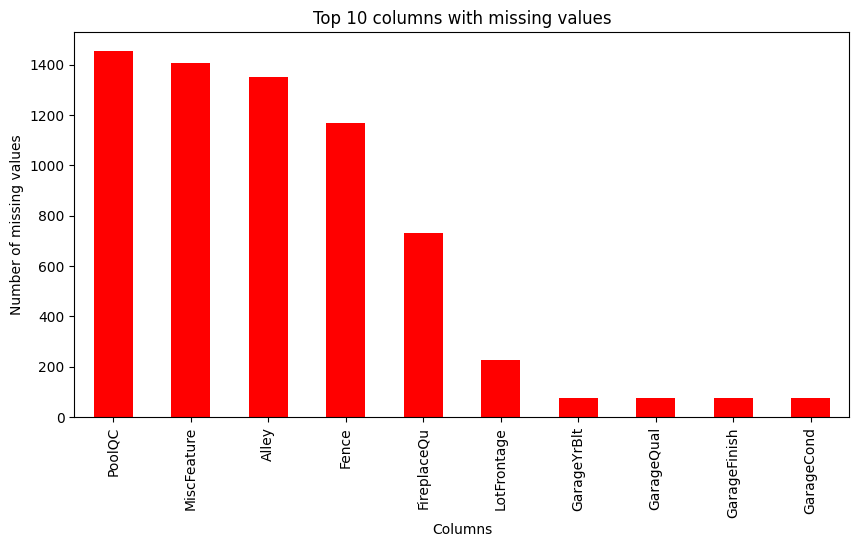

In [189]:
# Now I generate a plot to visualize the 10 columns with the most missing values in the dataset, but in terms of number of missing values. The percentage of missing values was only for my own understanding.
#  The plot is a bar plot, and I am using the imported libraries for this. 
plt.figure(figsize=(10,5))
df.isnull().sum().sort_values(ascending=False).head(10).plot(kind='bar', color='red')
plt.title('Top 10 columns with missing values')
plt.xlabel('Columns')
plt.ylabel('Number of missing values')
plt.show()


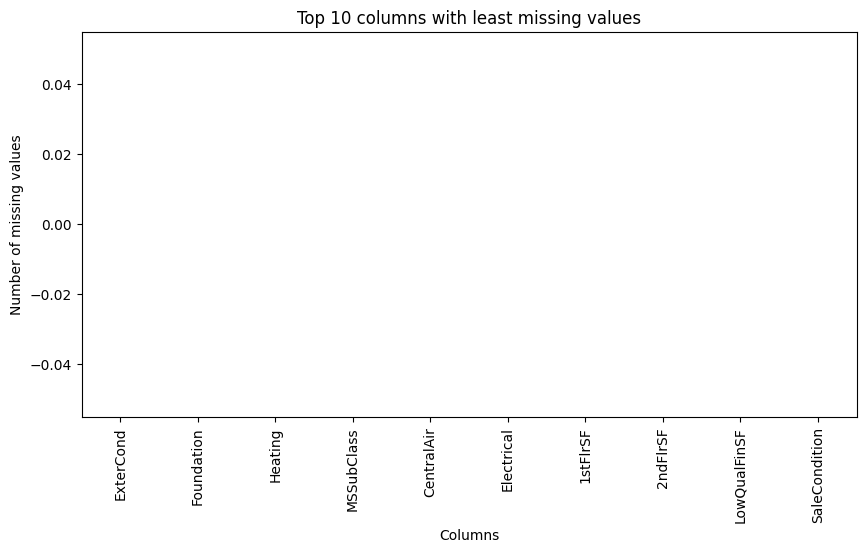

In [190]:
# Now, reversing the thinking process, I generate a bar plot to visualize the 10 columns with the least missing values in the dataset. This is to see if there are any columns that I can use in my analysis, 
# so it is relevant to see the columns with the least missing values because they are the ones that I can use, and therefore, the ones that most determine the price of the house.
plt.figure(figsize=(10,5))
df.isnull().sum().sort_values(ascending=False).tail(10).plot(kind='bar', color='green')
plt.title('Top 10 columns with least missing values')
plt.xlabel('Columns')
plt.ylabel('Number of missing values')
plt.show()


<AxesSubplot: >

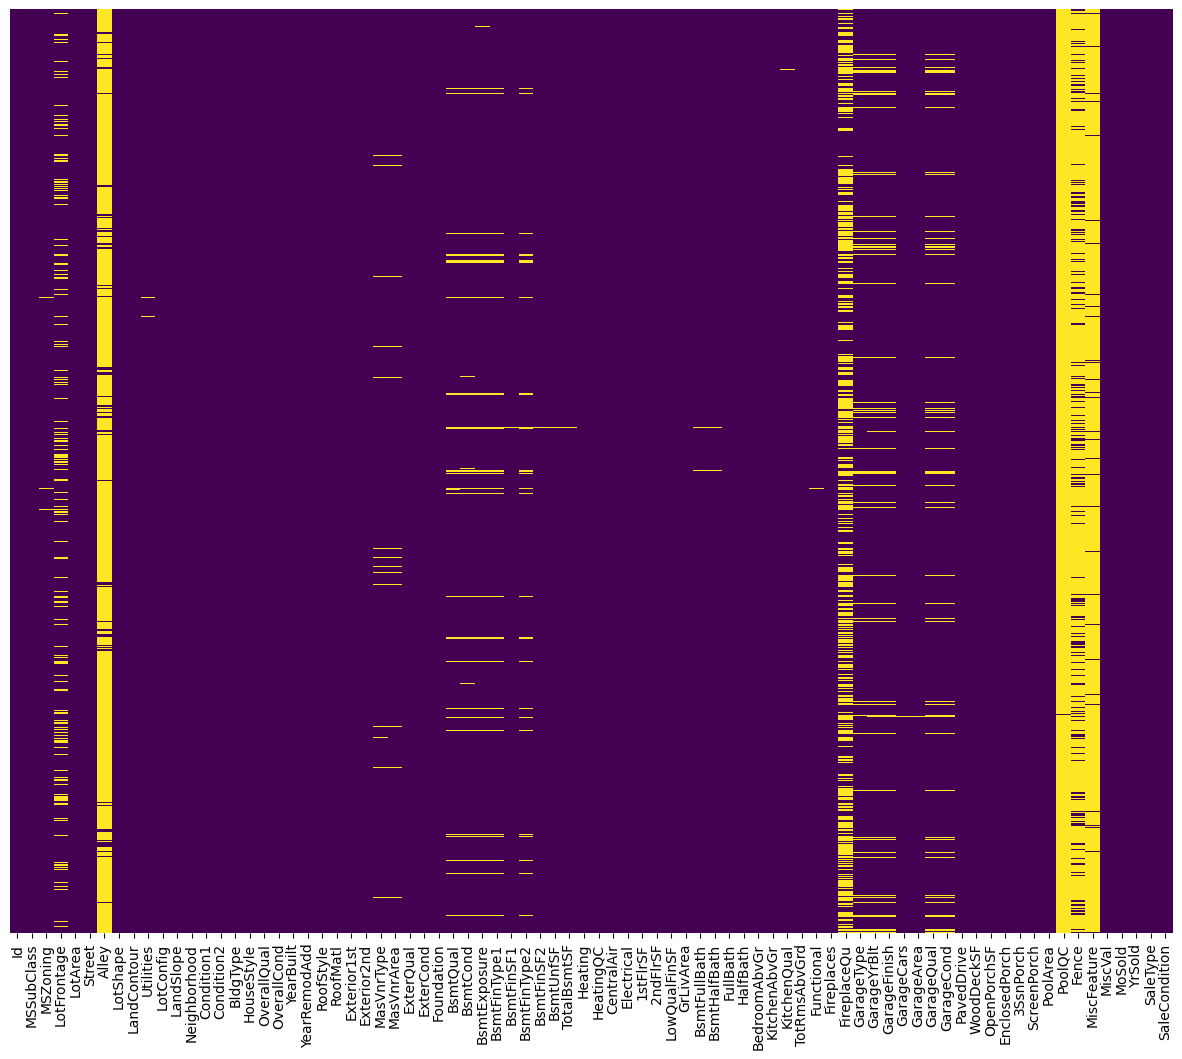

In [191]:
# Here I am generating a heatmap to visualize the missing values in the dataset. This is to see if there are any columns that have a lot of missing values, and therefore, I can drop them from the dataframe.
plt.subplots(figsize=(15,12)) 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [192]:
# So, I am dropping the columns with more than 50% of missing values. This is because I will not be using them in my analysis.
df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True)


<AxesSubplot: >

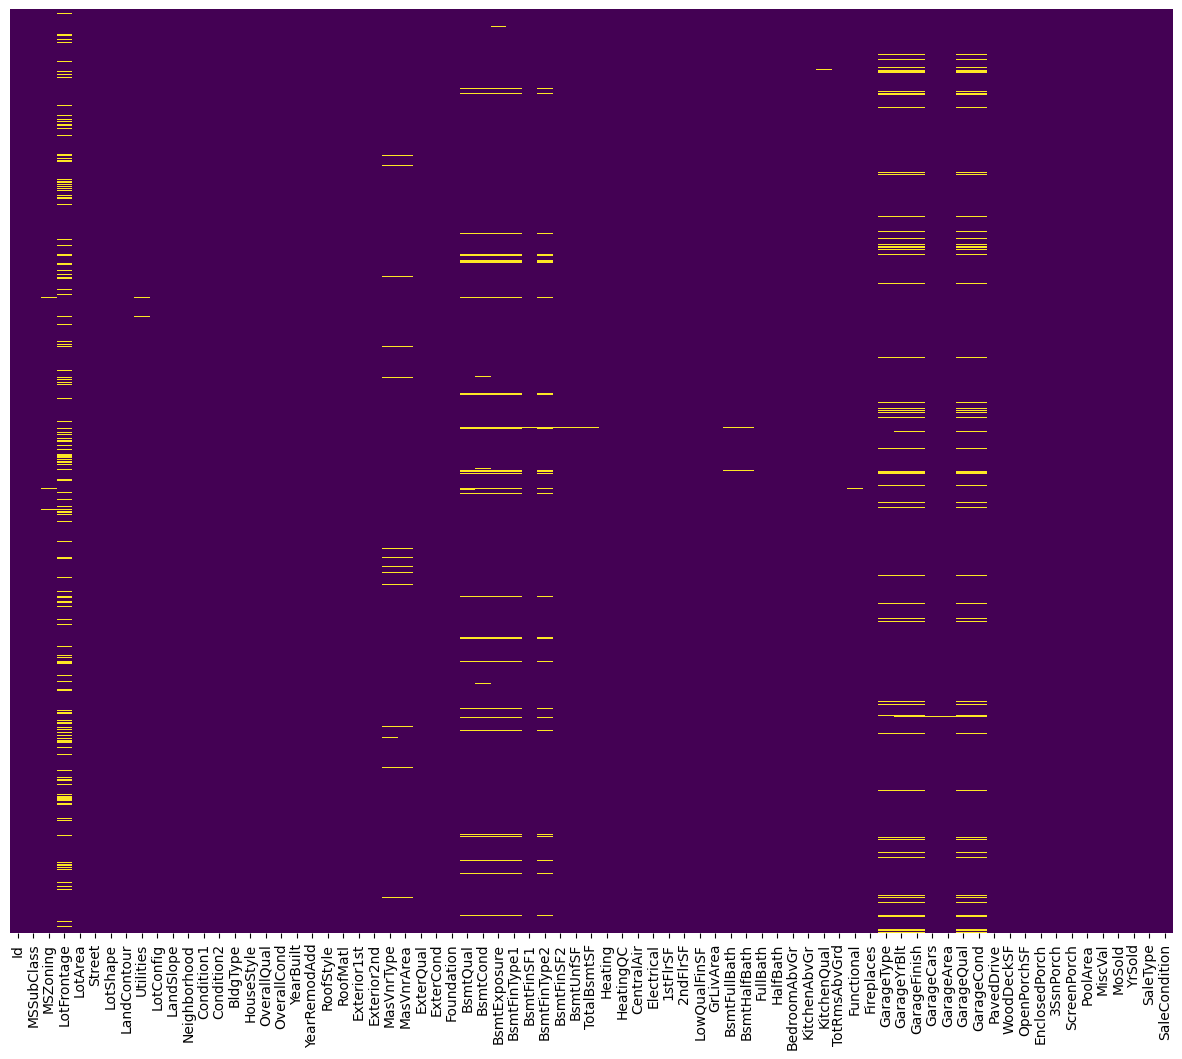

In [193]:
# Now I am generating a heatmap to visualize the missing values in the dataset. This is to see if there are any rows that have missing values, and therefore, I can drop them from the dataframe.
plt.subplots(figsize=(15,12)) 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [194]:
# Dropping rows with missing values,
df.dropna(inplace=True)

# and checking if there are any missing values left
df.isnull().sum().sum()



0

<AxesSubplot: >

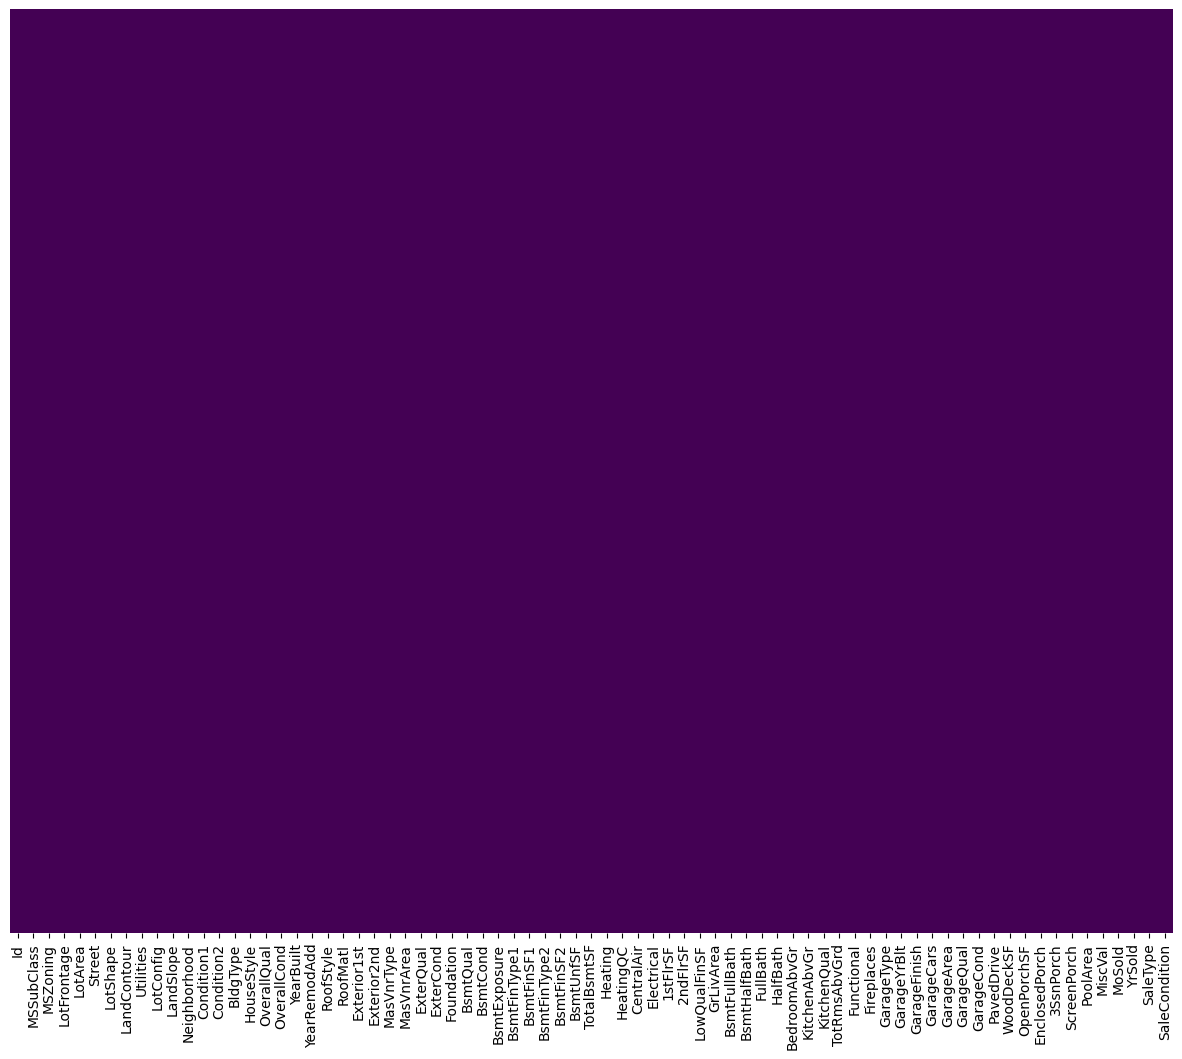

In [195]:
# Now I am generating a heatmap to visualize the missing values in the dataset.
plt.subplots(figsize=(15,12)) 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [196]:
# Yeiii!!! No more missing values in the dataset. Now I can proceed to the next step, which is to analyze the data and find the most important features that determine the price of the house.

# Checking the shape of the dataframe
df.shape


(1108, 75)

In [197]:
# Checking the data types of the columns
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 75, dtype: object

In [198]:
# Now, just for academic purposes, I convert the data type of the columns to the "appropriate" data type, assuming that the data type of the columns is the one that I want to use in my analysis. 
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['YrSold'] = df['YrSold'].astype('object')
df['MoSold'] = df['MoSold'].astype('object')


In [199]:
# One more time, checking the data types of the columns. This, as performing head of the dataframe, constantly is a good practice to make sure that the data is clean and ready to be analyzed.
df.dtypes

Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold            object
YrSold            object
SaleType          object
SaleCondition     object
Length: 75, dtype: object

In [200]:
# Now, I am checking the number of unique values in each column in order to appreciate the impact of each column in the analysis.
df.nunique()


Id               1108
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea           842
                 ... 
MiscVal            21
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
Length: 75, dtype: int64

In [201]:
# In the same line of thoughts, now I want to find the 25 columns with the most unique values and present them in terms of percentage of unique values.
df.nunique().sort_values(ascending=False).head(25)/len(df)

Id               1.000000
LotArea          0.759928
GrLivArea        0.651625
BsmtUnfSF        0.621841
1stFlrSF         0.598375
TotalBsmtSF      0.569495
BsmtFinSF1       0.507220
GarageArea       0.360108
2ndFlrSF         0.310469
MasVnrArea       0.235560
WoodDeckSF       0.206679
OpenPorchSF      0.169675
BsmtFinSF2       0.118231
LotFrontage      0.099278
EnclosedPorch    0.097473
YearBuilt        0.091155
GarageYrBlt      0.085740
ScreenPorch      0.058664
YearRemodAdd     0.055054
Neighborhood     0.022563
MiscVal          0.018953
MSSubClass       0.013538
MoSold           0.010830
Exterior2nd      0.010830
Exterior1st      0.009928
dtype: float64

In [202]:
#Now I want to find the 25 columns with the least unique values and present them in terms of percentage of unique values.
df.nunique().sort_values(ascending=False).tail(25)/len(df)

Condition2      0.004513
BldgType        0.004513
GarageCond      0.004513
GarageQual      0.003610
LotShape        0.003610
KitchenQual     0.003610
MasVnrType      0.003610
Electrical      0.003610
LandContour     0.003610
RoofMatl        0.003610
BsmtExposure    0.003610
BsmtCond        0.003610
BsmtQual        0.003610
ExterQual       0.003610
HalfBath        0.002708
GarageFinish    0.002708
BsmtHalfBath    0.002708
BsmtFullBath    0.002708
PavedDrive      0.002708
LandSlope       0.002708
Street          0.001805
KitchenAbvGr    0.001805
Heating         0.001805
CentralAir      0.001805
Utilities       0.000903
dtype: float64

In [203]:
# Dropping the id column, just because it is very noisy and it is not relevant for the analysis.
df.drop('Id', axis=1, inplace=True)


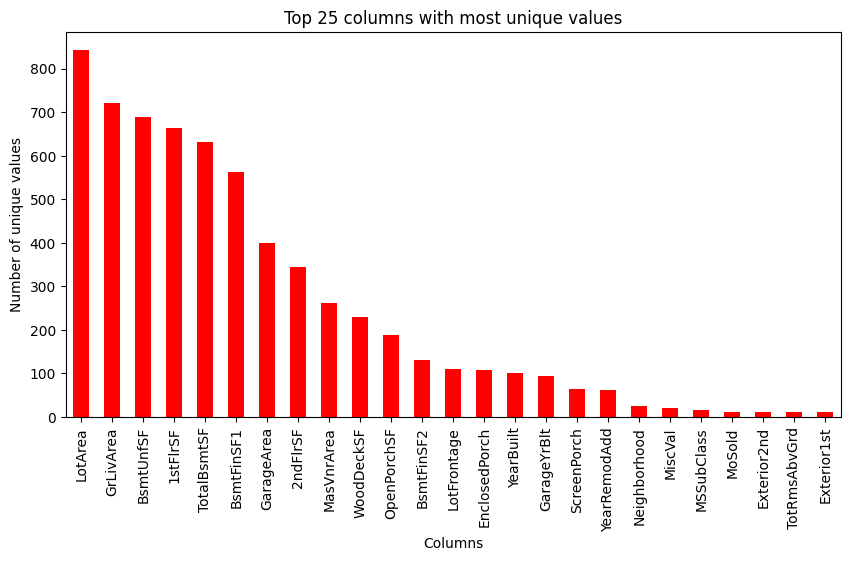

In [204]:
#Now, I am generating a bar plot to visualize the 25 columns with the most unique values in the dataset.
plt.figure(figsize=(10,5))
df.nunique().sort_values(ascending=False).head(25).plot(kind='bar', color='red')
plt.title('Top 25 columns with most unique values')
plt.xlabel('Columns')
plt.ylabel('Number of unique values')
plt.show()


In [205]:
# Keep the 25 columns with the most unique values and drop the rest
df.drop(['Street','Utilities','Condition2','RoofMatl','Heating','PoolArea','MiscVal','3SsnPorch','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','ScreenPorch','BsmtFinSF2','BsmtUnfSF','2ndFlrSF','HalfBath','BsmtFullBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','FullBath','GarageArea','GarageCars','TotalBsmtSF'], axis=1, inplace=True)


In [206]:
# Check the shape of the dataframe
df.shape

(1108, 49)

In [207]:
# Check the data types of the columns
df.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64
GrLivArea          int64
KitchenQual       object
Functional        object
GarageType        object
GarageYrBlt      float64
GarageFinish      object


In [208]:
# Show the columns with float data type
df.select_dtypes(include=['float64']).columns


Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'GarageYrBlt'], dtype='object')

In [209]:
# Drop the columns with float data type
df.drop(['LotFrontage','MasVnrArea','GarageYrBlt'], axis=1, inplace=True)


In [210]:
# Check the shape of the dataframe
df.shape

(1108, 46)

In [211]:
# Showing the columns with object data type
df.select_dtypes(include=['object']).columns


Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [212]:
# Showing the columns with int data type
df.select_dtypes(include=['int64']).columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       '1stFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF'],
      dtype='object')

In [213]:
df.head()


MSSubClass MSZoning  LotArea LotShape LandContour LotConfig LandSlope  \
0         20       RH    11622      Reg         Lvl    Inside       Gtl   
1         20       RL    14267      IR1         Lvl    Corner       Gtl   
2         60       RL    13830      IR1         Lvl    Inside       Gtl   
3         60       RL     9978      IR1         Lvl    Inside       Gtl   
4        120       RL     5005      IR1         HLS    Inside       Gtl   

  Neighborhood Condition1 BldgType  ... GarageFinish  GarageQual  GarageCond  \
0        NAmes      Feedr     1Fam  ...          Unf          TA          TA   
1        NAmes       Norm     1Fam  ...          Unf          TA          TA   
2      Gilbert       Norm     1Fam  ...          Fin          TA          TA   
3      Gilbert       Norm     1Fam  ...          Fin          TA          TA   
4      StoneBr       Norm   TwnhsE  ...          RFn          TA          TA   

   PavedDrive  WoodDeckSF OpenPorchSF MoSold YrSold SaleType SaleCondition  
0           Y         140           0      6   2010       WD        Normal  
1           Y         393          36      6   2010       WD        Normal  
2           Y         212          34      3   2010       WD        Normal  
3           Y         360          36      6   2010       WD        Normal  
4           Y           0          82      1   2010       WD        Normal  

[5 rows x 46 columns]

In [214]:
# Now, because I want to use integers for my analysis, but I need the input of the columns with object data type (categorical columns), now I apply a label encoding to the columns with object data type, 
# also fitting-transforming them to integers.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['MSSubClass'] = le.fit_transform(df['MSSubClass'])
df['MSZoning'] = le.fit_transform(df['MSZoning'])
df['LotShape'] = le.fit_transform(df['LotShape'])
df['LandContour'] = le.fit_transform(df['LandContour'])
df['LotConfig'] = le.fit_transform(df['LotConfig'])
df['LandSlope'] = le.fit_transform(df['LandSlope'])
df['Neighborhood'] = le.fit_transform(df['Neighborhood'])
df['Condition1'] = le.fit_transform(df['Condition1'])
df['BldgType'] = le.fit_transform(df['BldgType'])
df['HouseStyle'] = le.fit_transform(df['HouseStyle'])
df['RoofStyle'] = le.fit_transform(df['RoofStyle'])
df['Exterior1st'] = le.fit_transform(df['Exterior1st'])
df['Exterior2nd'] = le.fit_transform(df['Exterior2nd'])
df['MasVnrType'] = le.fit_transform(df['MasVnrType'])
df['ExterQual'] = le.fit_transform(df['ExterQual'])
df['ExterCond'] = le.fit_transform(df['ExterCond'])
df['Foundation'] = le.fit_transform(df['Foundation'])
df['BsmtQual'] = le.fit_transform(df['BsmtQual'])
df['BsmtCond'] = le.fit_transform(df['BsmtCond'])
df['BsmtExposure'] = le.fit_transform(df['BsmtExposure'])
df['BsmtFinType1'] = le.fit_transform(df['BsmtFinType1'])
df['BsmtFinType2'] = le.fit_transform(df['BsmtFinType2'])
df['HeatingQC'] = le.fit_transform(df['HeatingQC'])
df['CentralAir'] = le.fit_transform(df['CentralAir'])
df['Electrical'] = le.fit_transform(df['Electrical'])
df['KitchenQual'] = le.fit_transform(df['KitchenQual'])
df['Functional'] = le.fit_transform(df['Functional'])
df['GarageType'] = le.fit_transform(df['GarageType'])
df['GarageFinish'] = le.fit_transform(df['GarageFinish'])
df['GarageQual'] = le.fit_transform(df['GarageQual'])
df['GarageCond'] = le.fit_transform(df['GarageCond'])
df['PavedDrive'] = le.fit_transform(df['PavedDrive'])
df['SaleType'] = le.fit_transform(df['SaleType'])
df['SaleCondition'] = le.fit_transform(df['SaleCondition'])
df['YrSold'] = le.fit_transform(df['YrSold'])
df['MoSold'] = le.fit_transform(df['MoSold'])



In [215]:
# Checking the data types of the columns... yes! Now they are all integers.
 
df.dtypes


MSSubClass         int32
MSZoning           int32
LotArea            int64
LotShape           int32
LandContour        int32
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int32
Exterior1st        int32
Exterior2nd        int32
MasVnrType         int32
ExterQual          int32
ExterCond          int32
Foundation         int32
BsmtQual           int32
BsmtCond           int32
BsmtExposure       int32
BsmtFinType1       int32
BsmtFinSF1       float64
BsmtFinType2       int32
HeatingQC          int32
CentralAir         int32
Electrical         int32
1stFlrSF           int64
GrLivArea          int64
KitchenQual        int32
Functional         int32
GarageType         int32
GarageFinish       int32
GarageQual         int32
GarageCond         int32
PavedDrive         int32


In [216]:
# Show the head of the dataframe
df.head()

MSSubClass  MSZoning  LotArea  LotShape  LandContour  LotConfig  LandSlope  \
0           0         2    11622         3            3          4          0   
1           0         3    14267         0            3          0          0   
2           5         3    13830         0            3          4          0   
3           5         3     9978         0            3          4          0   
4          11         3     5005         0            1          4          0   

   Neighborhood  Condition1  BldgType  ...  GarageFinish  GarageQual  \
0            12           1         0  ...             2           3   
1            12           2         0  ...             2           3   
2             8           2         0  ...             0           3   
3             8           2         0  ...             0           3   
4            22           2         4  ...             1           3   

   GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  MoSold  YrSold  SaleType  \
0           4           2         140            0       5       4         8   
1           4           2         393           36       5       4         8   
2           4           2         212           34       2       4         8   
3           4           2         360           36       5       4         8   
4           4           2           0           82       0       4         8   

   SaleCondition  
0              4  
1              4  
2              4  
3              4  
4              4  

[5 rows x 46 columns]

In [217]:
# Show the shape of the dataframe
df.shape


(1108, 46)

In [218]:
# Now, for the main course, I proceed to apply statistical analysis to the resulting dataframe until now, in order to find the most relevant features for the analysis.

df.describe()


MSSubClass     MSZoning       LotArea     LotShape  LandContour  \
count  1108.000000  1108.000000   1108.000000  1108.000000  1108.000000   
mean      4.123646     3.046029   9459.198556     2.102888     2.773466   
std       4.195543     0.654808   4211.982189     1.358925     0.703675   
min       0.000000     0.000000   1484.000000     0.000000     0.000000   
25%       0.000000     3.000000   7200.000000     0.000000     3.000000   
50%       4.000000     3.000000   9350.000000     3.000000     3.000000   
75%       6.000000     3.000000  11170.500000     3.000000     3.000000   
max      14.000000     4.000000  51974.000000     3.000000     3.000000   

         LotConfig    LandSlope  Neighborhood   Condition1     BldgType  ...  \
count  1108.000000  1108.000000   1108.000000  1108.000000  1108.000000  ...   
mean      3.166968     0.046931     12.668773     2.044224     0.521661  ...   
std       1.553069     0.215815      5.887644     0.824661     1.248117  ...   
min       0.000000     0.000000      0.000000     0.000000     0.000000  ...   
25%       4.000000     0.000000      8.000000     2.000000     0.000000  ...   
50%       4.000000     0.000000     12.000000     2.000000     0.000000  ...   
75%       4.000000     0.000000     17.000000     2.000000     0.000000  ...   
max       4.000000     2.000000     24.000000     8.000000     4.000000  ...   

       GarageFinish   GarageQual   GarageCond   PavedDrive   WoodDeckSF  \
count   1108.000000  1108.000000  1108.000000  1108.000000  1108.000000   
mean       1.194043     2.809567     3.910650     1.851083    93.947653   
std        0.827094     0.719341     0.495831     0.501514   123.630620   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     3.000000     4.000000     2.000000     0.000000   
50%        1.000000     3.000000     4.000000     2.000000     0.000000   
75%        2.000000     3.000000     4.000000     2.000000   168.000000   
max        2.000000     3.000000     4.000000     2.000000   870.000000   

       OpenPorchSF       MoSold       YrSold     SaleType  SaleCondition  
count  1108.000000  1108.000000  1108.000000  1108.000000    1108.000000  
mean     48.603791     5.110108     1.772563     7.444946       3.828520  
std      67.619673     2.752115     1.315836     1.643921       1.021635  
min       0.000000     0.000000     0.000000     0.000000       0.000000  
25%       0.000000     3.000000     1.000000     8.000000       4.000000  
50%      28.000000     5.000000     2.000000     8.000000       4.000000  
75%      72.000000     7.000000     3.000000     8.000000       4.000000  
max     570.000000    11.000000     4.000000     8.000000       5.000000  

[8 rows x 46 columns]

In [219]:
# Showing the correlation between the features
df.corr()


MSSubClass  MSZoning   LotArea  LotShape  LandContour  \
MSSubClass       1.000000  0.050208 -0.365886 -0.021563    -0.013758   
MSZoning         0.050208  1.000000 -0.072216  0.137813    -0.049888   
LotArea         -0.365886 -0.072216  1.000000 -0.249992    -0.061556   
LotShape        -0.021563  0.137813 -0.249992  1.000000     0.116975   
LandContour     -0.013758 -0.049888 -0.061556  0.116975     1.000000   
LotConfig        0.059215  0.036850 -0.156182  0.146797    -0.024873   
LandSlope        0.002564  0.074192  0.019944 -0.090404    -0.417697   
Neighborhood     0.017640 -0.316348  0.103011 -0.062351     0.044232   
Condition1      -0.021164 -0.040576  0.100633 -0.087091     0.028177   
BldgType         0.718415 -0.058144 -0.450423 -0.025815    -0.018579   
HouseStyle       0.390073 -0.103405 -0.004034 -0.158908     0.065786   
OverallQual      0.073943 -0.235720  0.189411 -0.365715    -0.085836   
OverallCond     -0.073809  0.183894 -0.104515  0.171363    -0.029631   
YearBuilt        0.063413 -0.388090  0.119836 -0.377942     0.068910   
YearRemodAdd     0.064468 -0.263746  0.115713 -0.295684     0.024807   
RoofStyle       -0.184612 -0.027407  0.179561 -0.065948    -0.067097   
Exterior1st     -0.123829 -0.082260  0.078554 -0.025525     0.083680   
Exterior2nd     -0.142513 -0.080063  0.120840 -0.042739     0.072859   
MasVnrType       0.005434  0.026130 -0.064602  0.022455    -0.094651   
ExterQual       -0.001669  0.224620 -0.182280  0.292547     0.074759   
ExterCond        0.009345 -0.112819 -0.026857 -0.077082     0.010295   
Foundation       0.075602 -0.337815  0.134301 -0.297758     0.051366   
BsmtQual        -0.054638  0.155632 -0.188859  0.314164     0.109755   
BsmtCond        -0.003691 -0.073915 -0.005263 -0.065068     0.033879   
BsmtExposure    -0.092910  0.063057 -0.174758  0.245482     0.107555   
BsmtFinType1    -0.023415  0.079083 -0.020495  0.033935    -0.004292   
BsmtFinSF1      -0.089347 -0.090614  0.256696 -0.176751    -0.080588   
BsmtFinType2     0.026079  0.022168 -0.022205  0.000208     0.040182   
HeatingQC       -0.015460  0.230921 -0.095553  0.237012     0.017472   
CentralAir      -0.002183 -0.093410  0.056820 -0.101379     0.089039   
Electrical       0.053049 -0.129304  0.044570 -0.147505     0.002136   
1stFlrSF        -0.244362 -0.151343  0.486081 -0.232723    -0.100292   
GrLivArea        0.107865 -0.088413  0.418505 -0.229858    -0.083648   
KitchenQual      0.038387  0.177795 -0.189229  0.254937     0.094685   
Functional      -0.023652 -0.023924 -0.113309 -0.060689     0.027627   
GarageType       0.104523  0.245318 -0.259892  0.281945    -0.030504   
GarageFinish    -0.002755  0.203663 -0.179228  0.360771     0.004198   
GarageQual       0.011101 -0.169319  0.058422 -0.094527     0.075313   
GarageCond      -0.007277 -0.101396  0.074080 -0.102983    -0.011462   
PavedDrive       0.039241 -0.135903 -0.000701 -0.167042    -0.013767   
WoodDeckSF      -0.012673 -0.049961  0.214599 -0.189449    -0.024517   
OpenPorchSF     -0.014436 -0.246142  0.180365 -0.119471    -0.030346   
MoSold           0.021351 -0.035899  0.021867  0.043102    -0.019294   
YrSold          -0.031718 -0.039212 -0.042574  0.017140     0.020403   
SaleType         0.050037  0.006972 -0.000125 -0.036686    -0.016648   
SaleCondition    0.017385 -0.081364  0.026566 -0.132380     0.035132   

               LotConfig  LandSlope  Neighborhood  Condition1  BldgType  ...  \
MSSubClass      0.059215   0.002564      0.017640   -0.021164  0.718415  ...   
MSZoning        0.036850   0.074192     -0.316348   -0.040576 -0.058144  ...   
LotArea        -0.156182   0.019944      0.103011    0.100633 -0.450423  ...   
LotShape        0.146797  -0.090404     -0.062351   -0.087091 -0.025815  ...   
LandContour    -0.024873  -0.417697      0.044232    0.028177 -0.018579  ...   
LotConfig       1.000000   0.060149     -0.107260    0.101438  0.093900  ...   
LandSlope       0.060149   1.000000     -0.121411    0.003555  0.08006

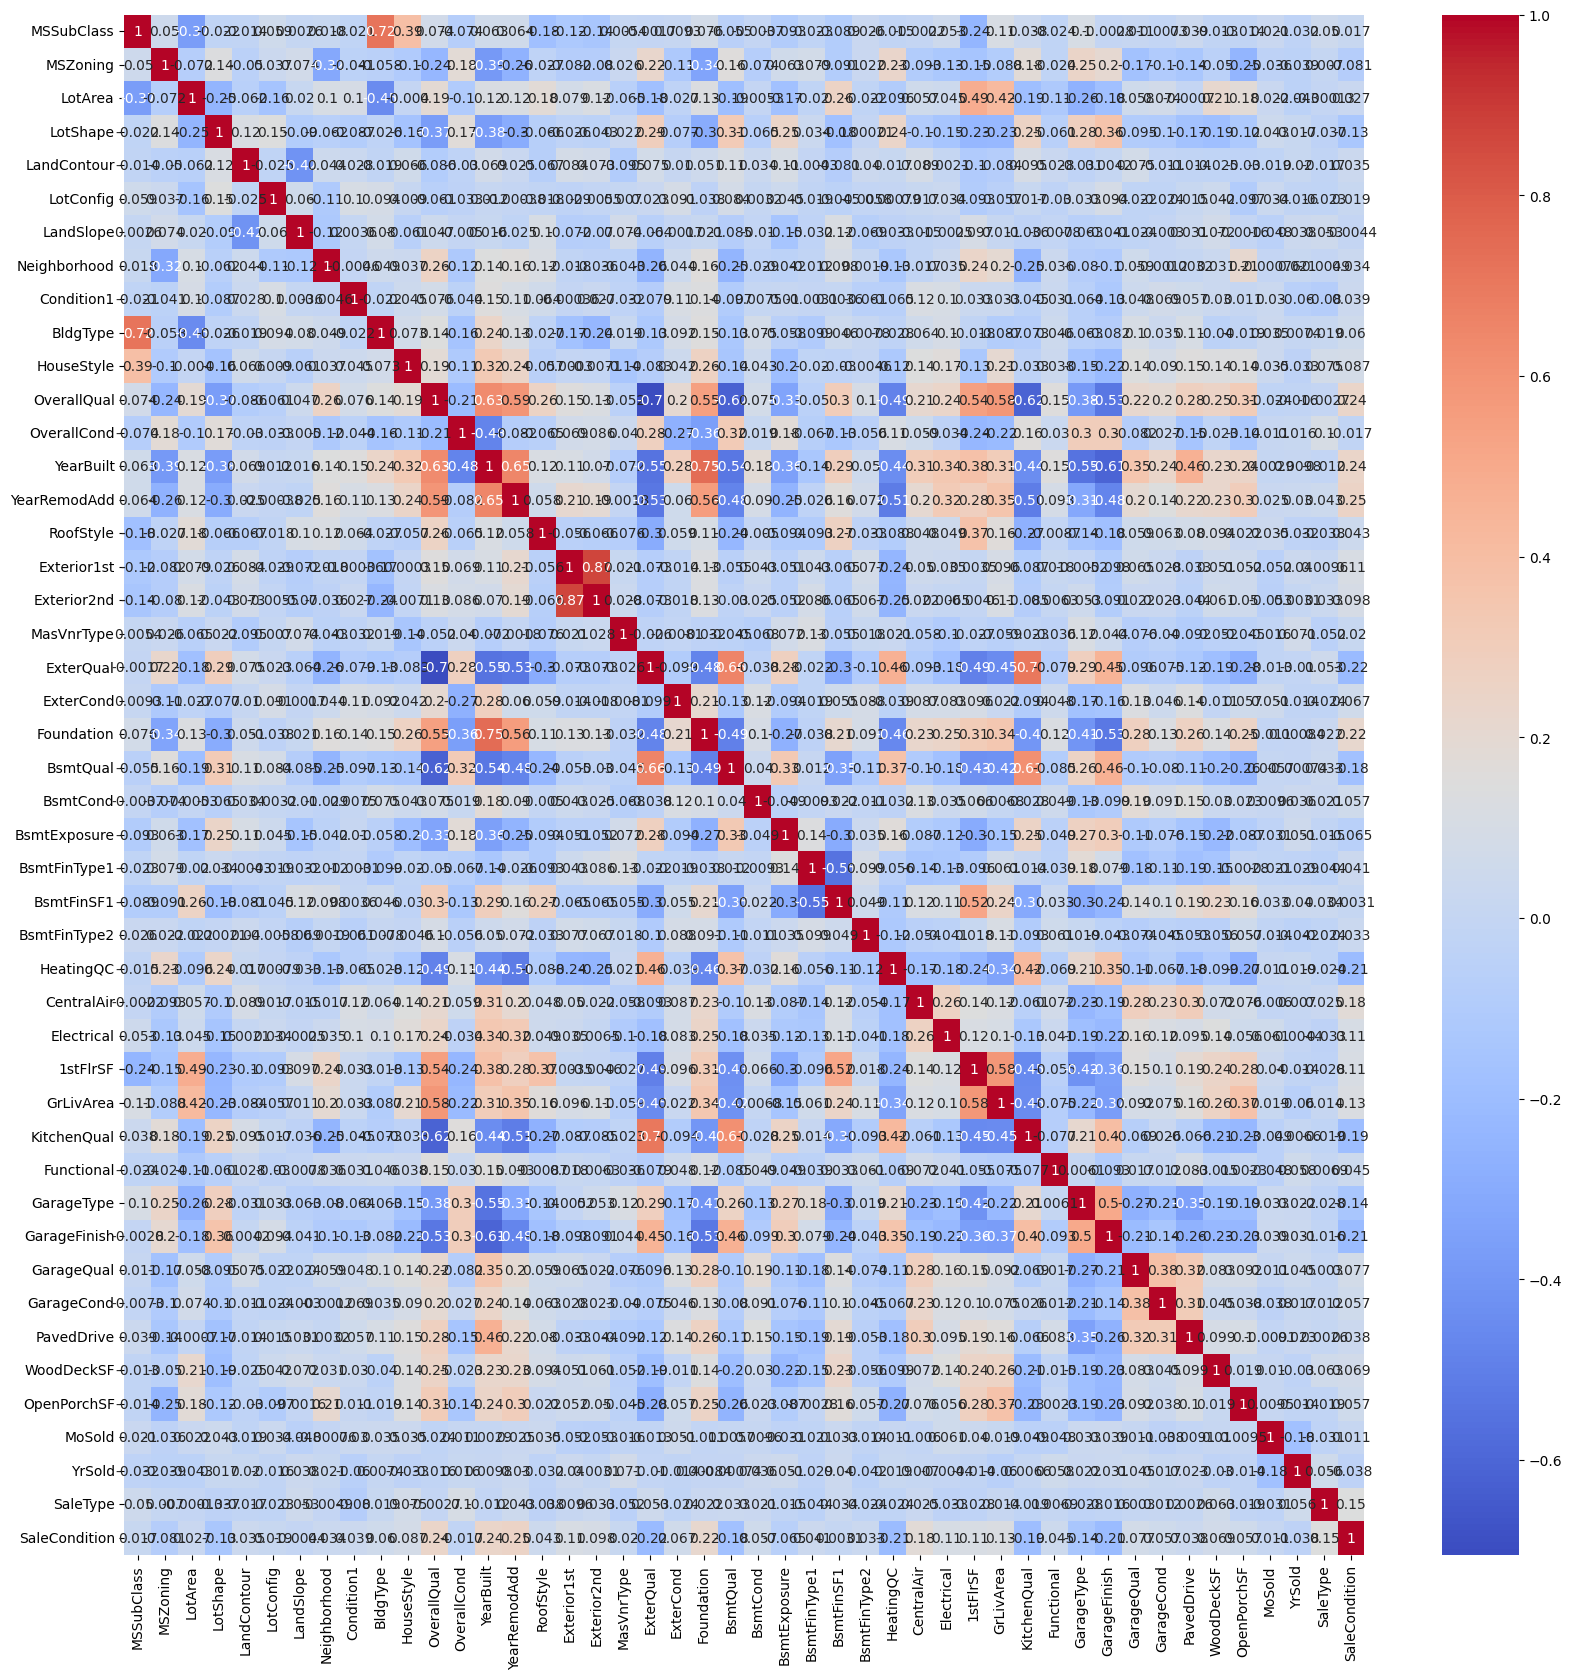

In [220]:
# Showing the correlation between the features in a heatmap plot.
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


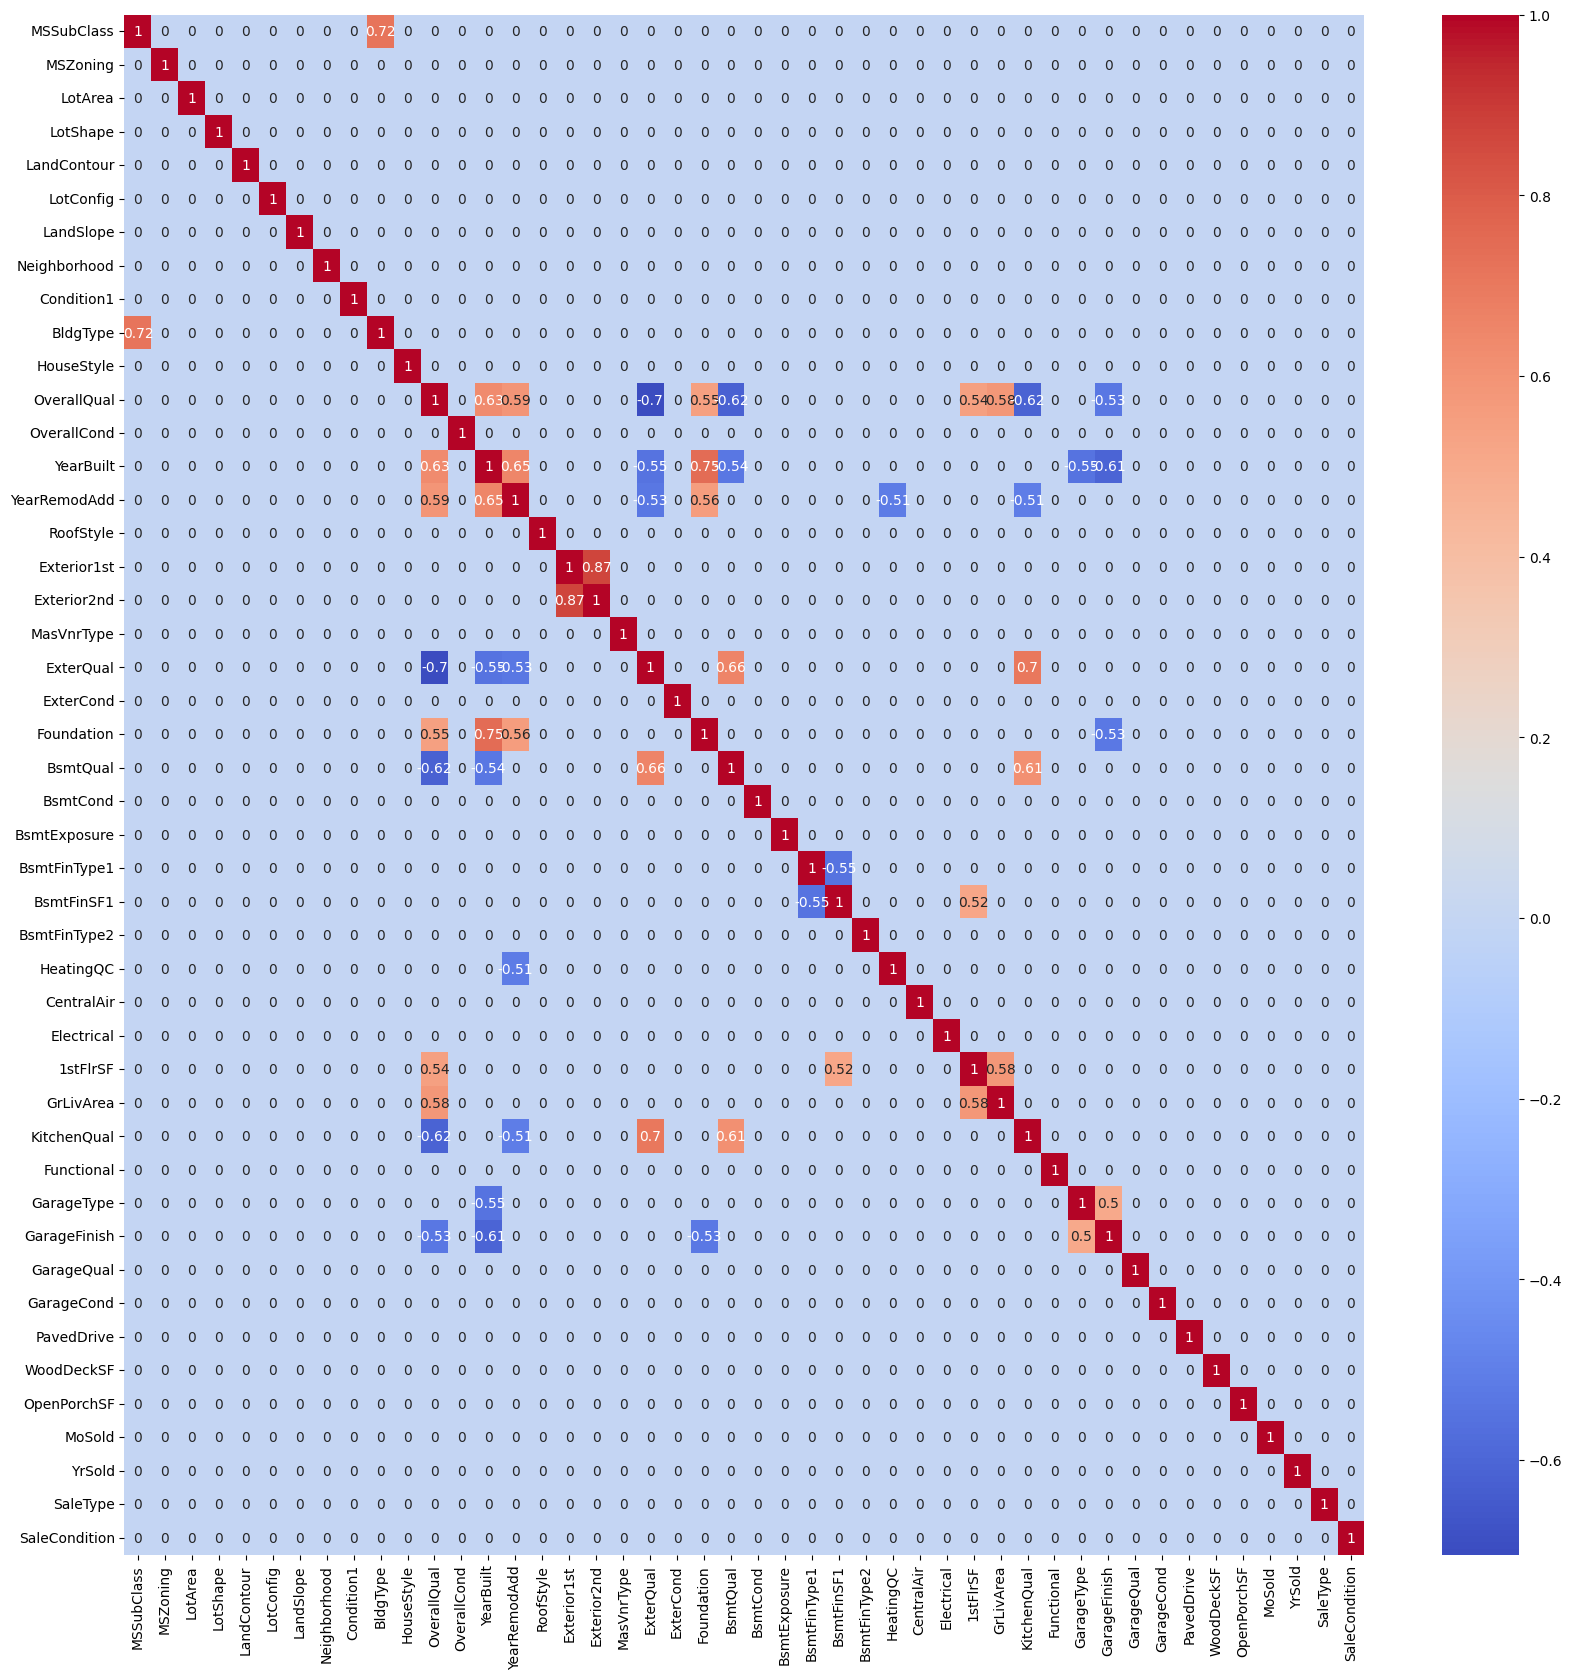

In [221]:
# Uggghhh, this is a mess! I need to find a way to visualize the correlation between the features in a better way. I will adapt the correlation matrix to show only the features with correlation higher than 0.5.
corr_matrix = df.corr()
corr_matrix[abs(corr_matrix) < 0.5] = 0
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [222]:
# Ok, now I again apply statistical values to the dataframe in order to see the correlation between the features.
df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates()



MSSubClass   MSSubClass      1.000000
Exterior2nd  Exterior1st     0.870601
Foundation   YearBuilt       0.745768
MSSubClass   BldgType        0.718415
ExterQual    OverallQual     0.704708
                               ...   
LotConfig    YearRemodAdd    0.000376
Condition1   Exterior1st     0.000365
HouseStyle   Exterior1st     0.000301
LotShape     BsmtFinType2    0.000208
SaleType     LotArea         0.000125
Length: 1036, dtype: float64

In [223]:
# Taking into consideration the previous results, now I show the most important features of the dataframe, adn I drop the duplicates.
df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates().head(20)


MSSubClass    MSSubClass      1.000000
Exterior2nd   Exterior1st     0.870601
Foundation    YearBuilt       0.745768
MSSubClass    BldgType        0.718415
ExterQual     OverallQual     0.704708
KitchenQual   ExterQual       0.704407
BsmtQual      ExterQual       0.658908
YearBuilt     YearRemodAdd    0.649429
              OverallQual     0.633093
OverallQual   BsmtQual        0.618485
KitchenQual   OverallQual     0.616687
YearBuilt     GarageFinish    0.609733
BsmtQual      KitchenQual     0.608108
OverallQual   YearRemodAdd    0.589410
              GrLivArea       0.583851
1stFlrSF      GrLivArea       0.580739
YearRemodAdd  Foundation      0.555512
GarageType    YearBuilt       0.550863
YearBuilt     ExterQual       0.547231
Foundation    OverallQual     0.546706
dtype: float64

Next, here they come the Statistical Analysis and the Hypothesis Testing to extract the most relevant features of the house that determine the sale price.

In [224]:
# With sklearn I will apply a model of linear regression to the dataframe.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_tweedie_deviance
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error



In [225]:
# Featuring reduction using the results of the previous analysis.
df.drop(['SaleType','SaleCondition','Functional','PavedDrive','WoodDeckSF','OpenPorchSF','MoSold','YrSold','GarageCond','GarageQual','GarageFinish','GarageType','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','MasVnrType','Exterior2nd','Exterior1st','RoofStyle','HouseStyle','BldgType','Condition1','Neighborhood','LandSlope','LotConfig','LandContour','LotShape','MSZoning','MSSubClass'], axis=1, inplace=True)


In [226]:
# Showing the head of the remaining dataframe, which is the one I will use for the analysis of the linear regression model because it contains the most relevant features.
df.head()

LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  ExterQual  \
0    11622            5            6       1961          1961          3   
1    14267            6            6       1958          1958          3   
2    13830            5            5       1997          1998          3   
3     9978            6            6       1998          1998          3   
4     5005            8            5       1992          1992          2   

   ExterCond  Foundation  BsmtFinSF1  BsmtFinType2  HeatingQC  CentralAir  \
0          4           1       468.0             3          4           1   
1          4           1       923.0             5          4           1   
2          4           2       791.0             5          2           1   
3          4           2       602.0             5          0           1   
4          4           2       263.0             5          0           1   

   Electrical  1stFlrSF  GrLivArea  KitchenQual  
0           3       896        896            3  
1           3      1329       1329            2  
2           3       928       1629            3  
3           3       926       1604            2  
4           3      1280       1280            2

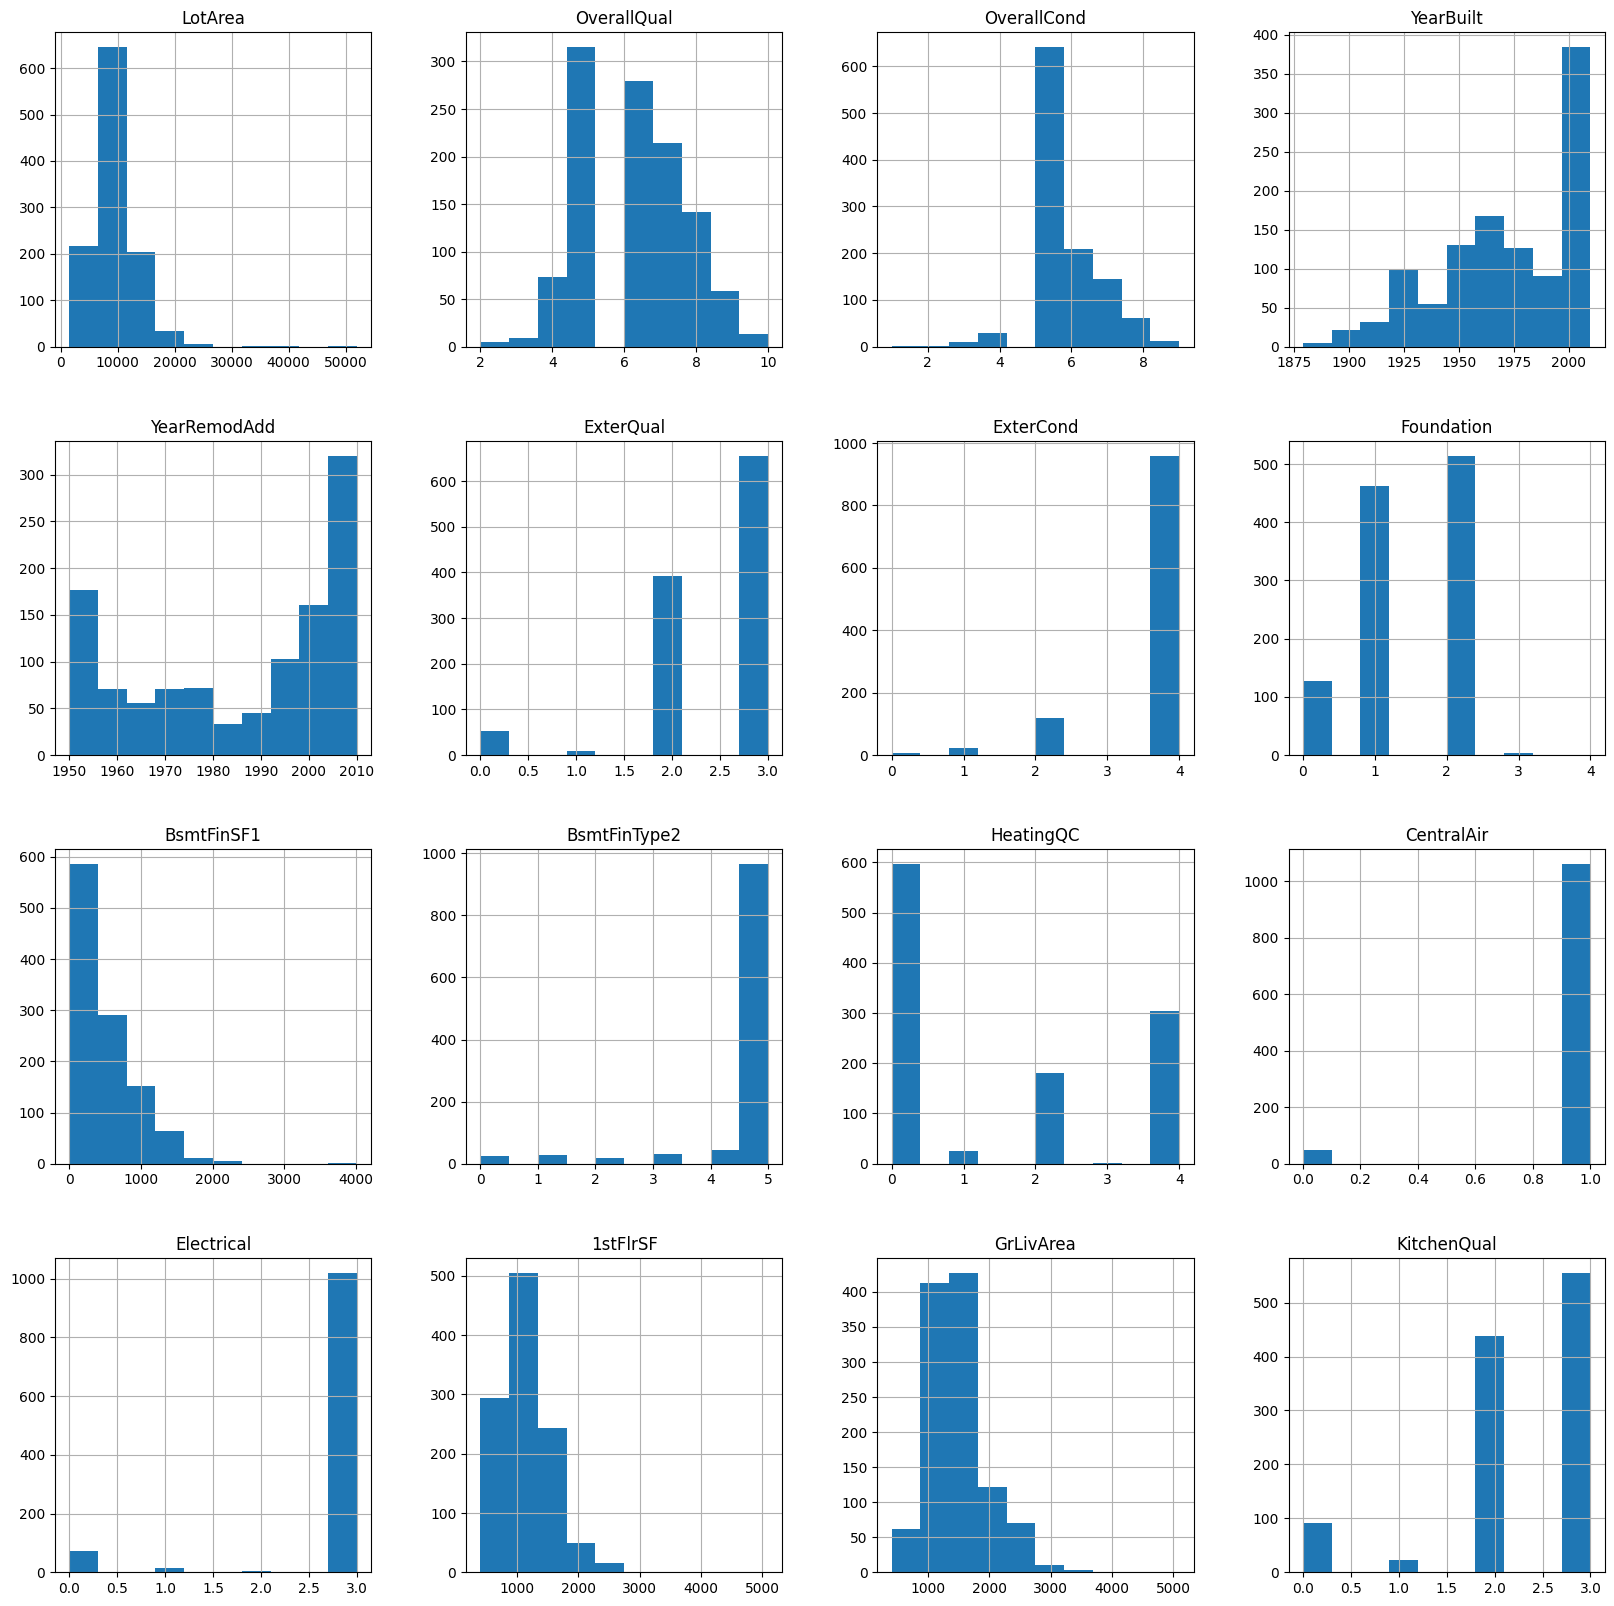

In [227]:
# Creating a histogram graph to show the data distribution of the resulting dataframe.
df.hist(figsize=(20,20))
plt.show()


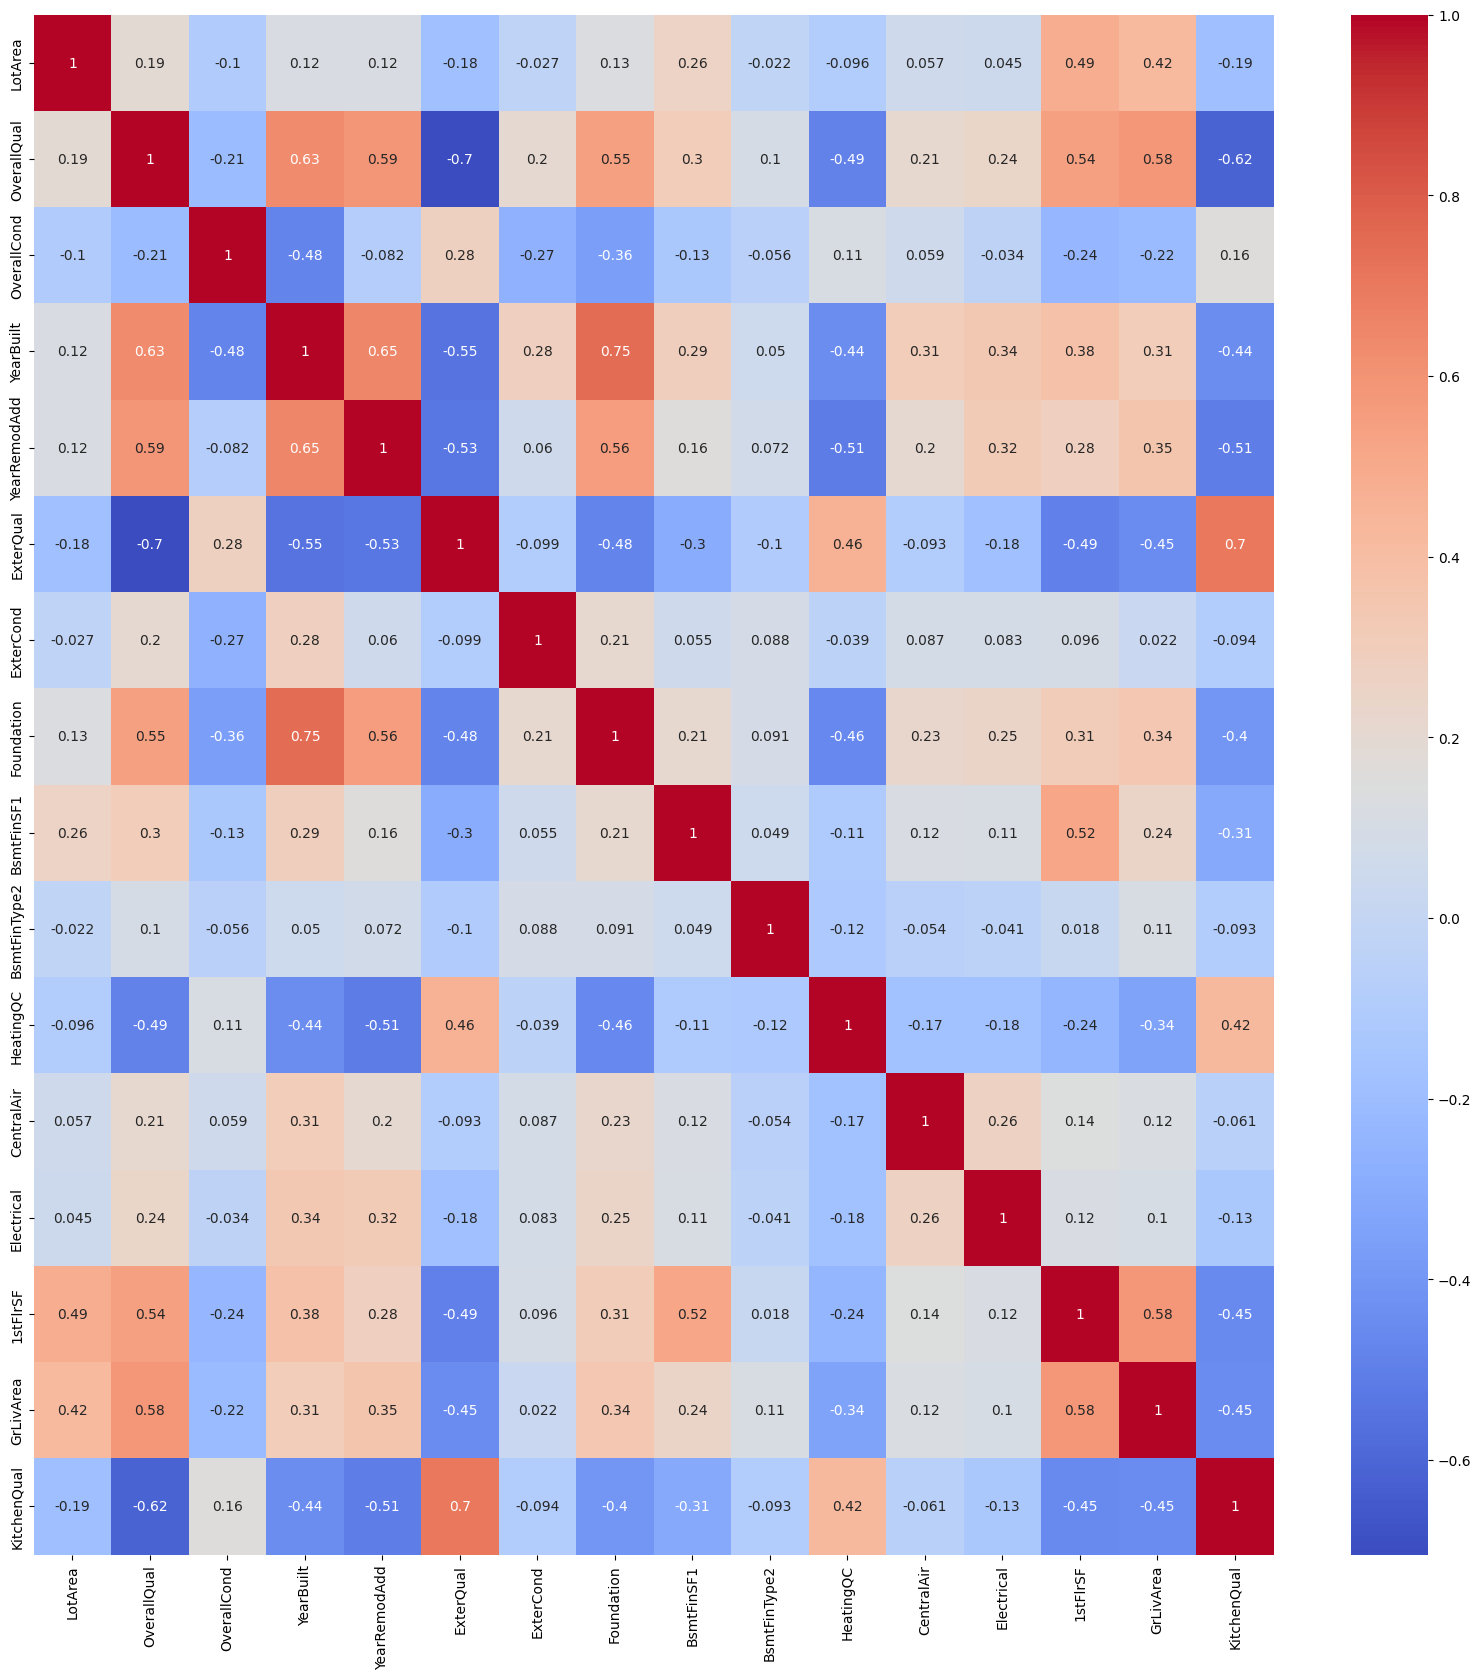

In [228]:
# Creating a heatmap to show the data distribution of the resulting dataframe.
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


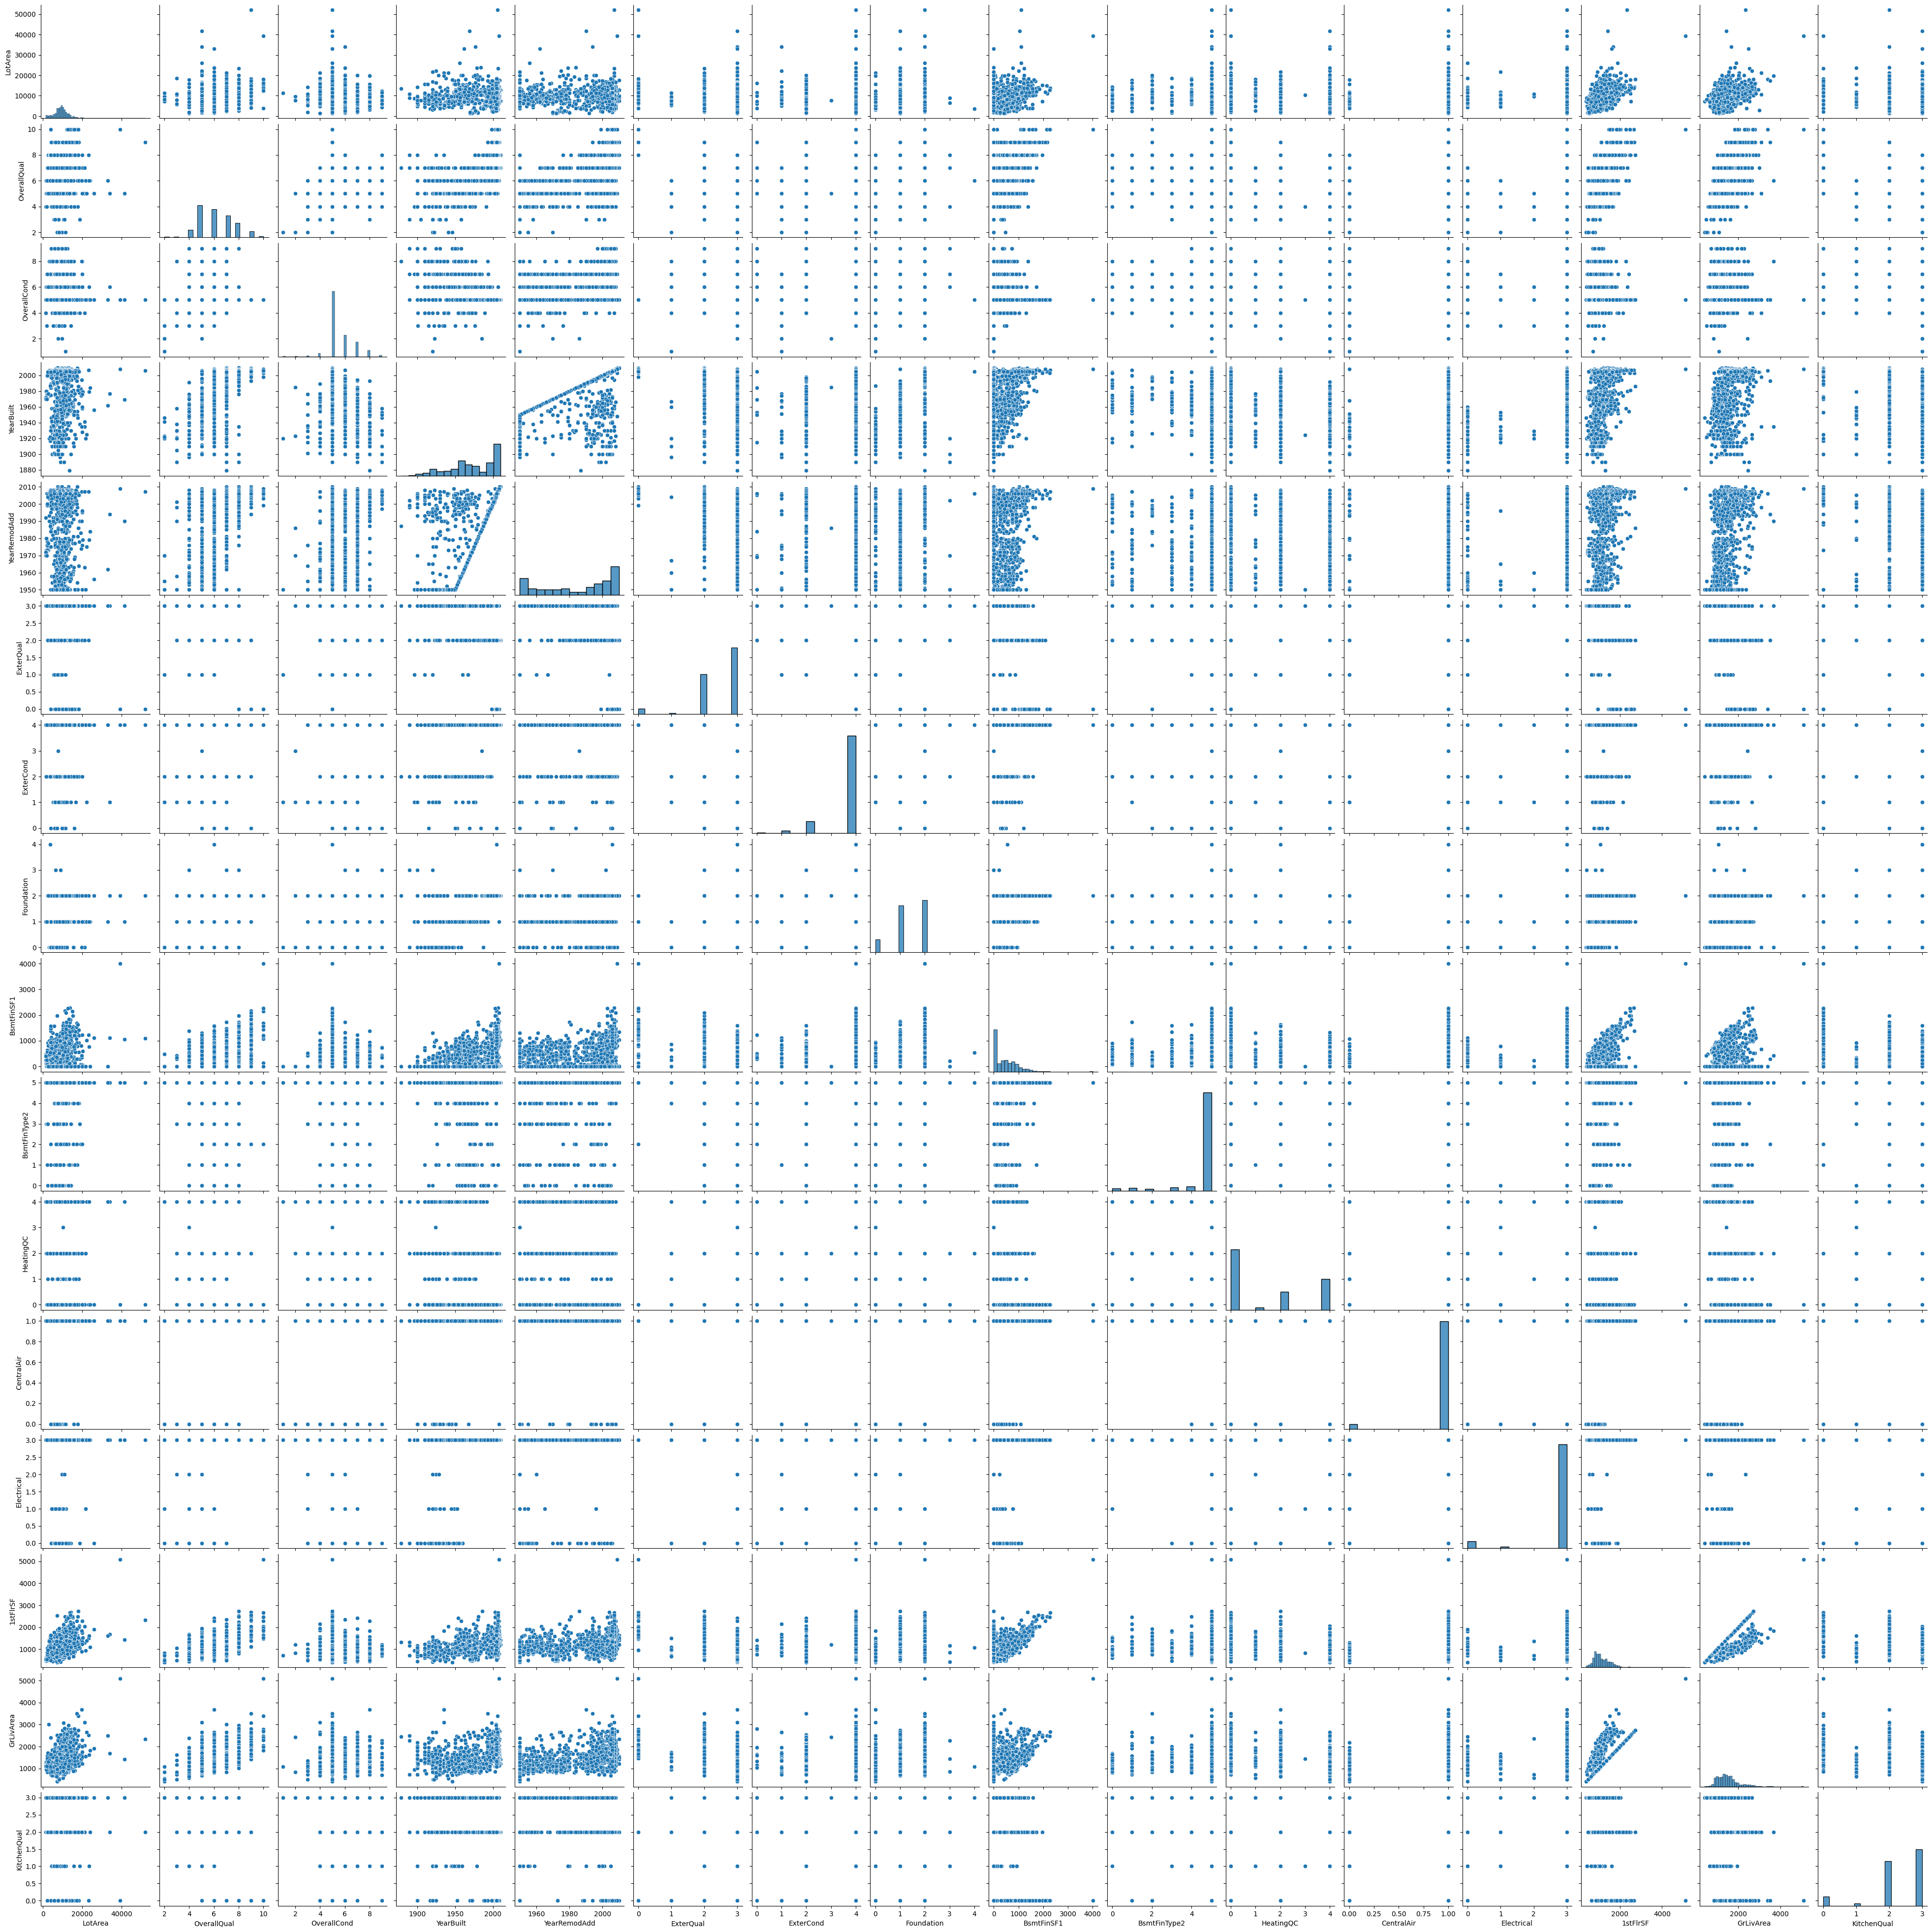

In [229]:
# Create a scatterplot to show the data distribution of the resulting dataframe.
sns.pairplot(df)
plt.show()


In [230]:
# Now, I generate a list of the most important features of the dataframe and show them in terms of percentage, in order to use them in the linear regression model.
df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates().head(10)
print(df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates().head(10))


LotArea       LotArea         1.000000
YearBuilt     Foundation      0.745768
ExterQual     OverallQual     0.704708
KitchenQual   ExterQual       0.704407
YearBuilt     YearRemodAdd    0.649429
OverallQual   YearBuilt       0.633093
KitchenQual   OverallQual     0.616687
YearRemodAdd  OverallQual     0.589410
GrLivArea     OverallQual     0.583851
              1stFlrSF        0.580739
dtype: float64


In [231]:
# Appliying statistical analysis to the resulting dataframe.
df.describe()


LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count   1108.000000  1108.000000  1108.000000  1108.000000   1108.000000   
mean    9459.198556     6.194946     5.601083  1972.340253   1984.582130   
std     4211.982189     1.421824     1.045349    30.596756     21.171847   
min     1484.000000     2.000000     1.000000  1879.000000   1950.000000   
25%     7200.000000     5.000000     5.000000  1953.750000   1964.000000   
50%     9350.000000     6.000000     5.000000  1974.000000   1993.500000   
75%    11170.500000     7.000000     6.000000  2003.000000   2005.000000   
max    51974.000000    10.000000     9.000000  2010.000000   2010.000000   

         ExterQual    ExterCond   Foundation   BsmtFinSF1  BsmtFinType2  \
count  1108.000000  1108.000000  1108.000000  1108.000000   1108.000000   
mean      2.487365     3.698556     1.356498   450.793321      4.646209   
std       0.744036     0.790251     0.686812   464.795521      1.060634   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       2.000000     4.000000     1.000000     0.000000      5.000000   
50%       3.000000     4.000000     1.000000   364.500000      5.000000   
75%       3.000000     4.000000     2.000000   758.000000      5.000000   
max       3.000000     4.000000     4.000000  4010.000000      5.000000   

         HeatingQC   CentralAir   Electrical     1stFlrSF    GrLivArea  \
count  1108.000000  1108.000000  1108.000000  1108.000000  1108.000000   
mean      1.452166     0.956679     2.777978  1156.380866  1482.823105   
std       1.726164     0.203671     0.764728   406.459387   480.507697   
min       0.000000     0.000000     0.000000   407.000000   407.000000   
25%       0.000000     1.000000     3.000000   864.000000  1132.750000   
50%       0.000000     1.000000     3.000000  1072.000000  1429.000000   
75%       4.000000     1.000000     3.000000  1384.750000  1699.000000   
max       4.000000     1.000000     3.000000  5095.000000  5095.000000   

       KitchenQual  
count  1108.000000  
mean      2.314982  
std       0.868536  
min       0.000000  
25%       2.000000  
50%       3.000000  
75%       3.000000  
max       3.000000

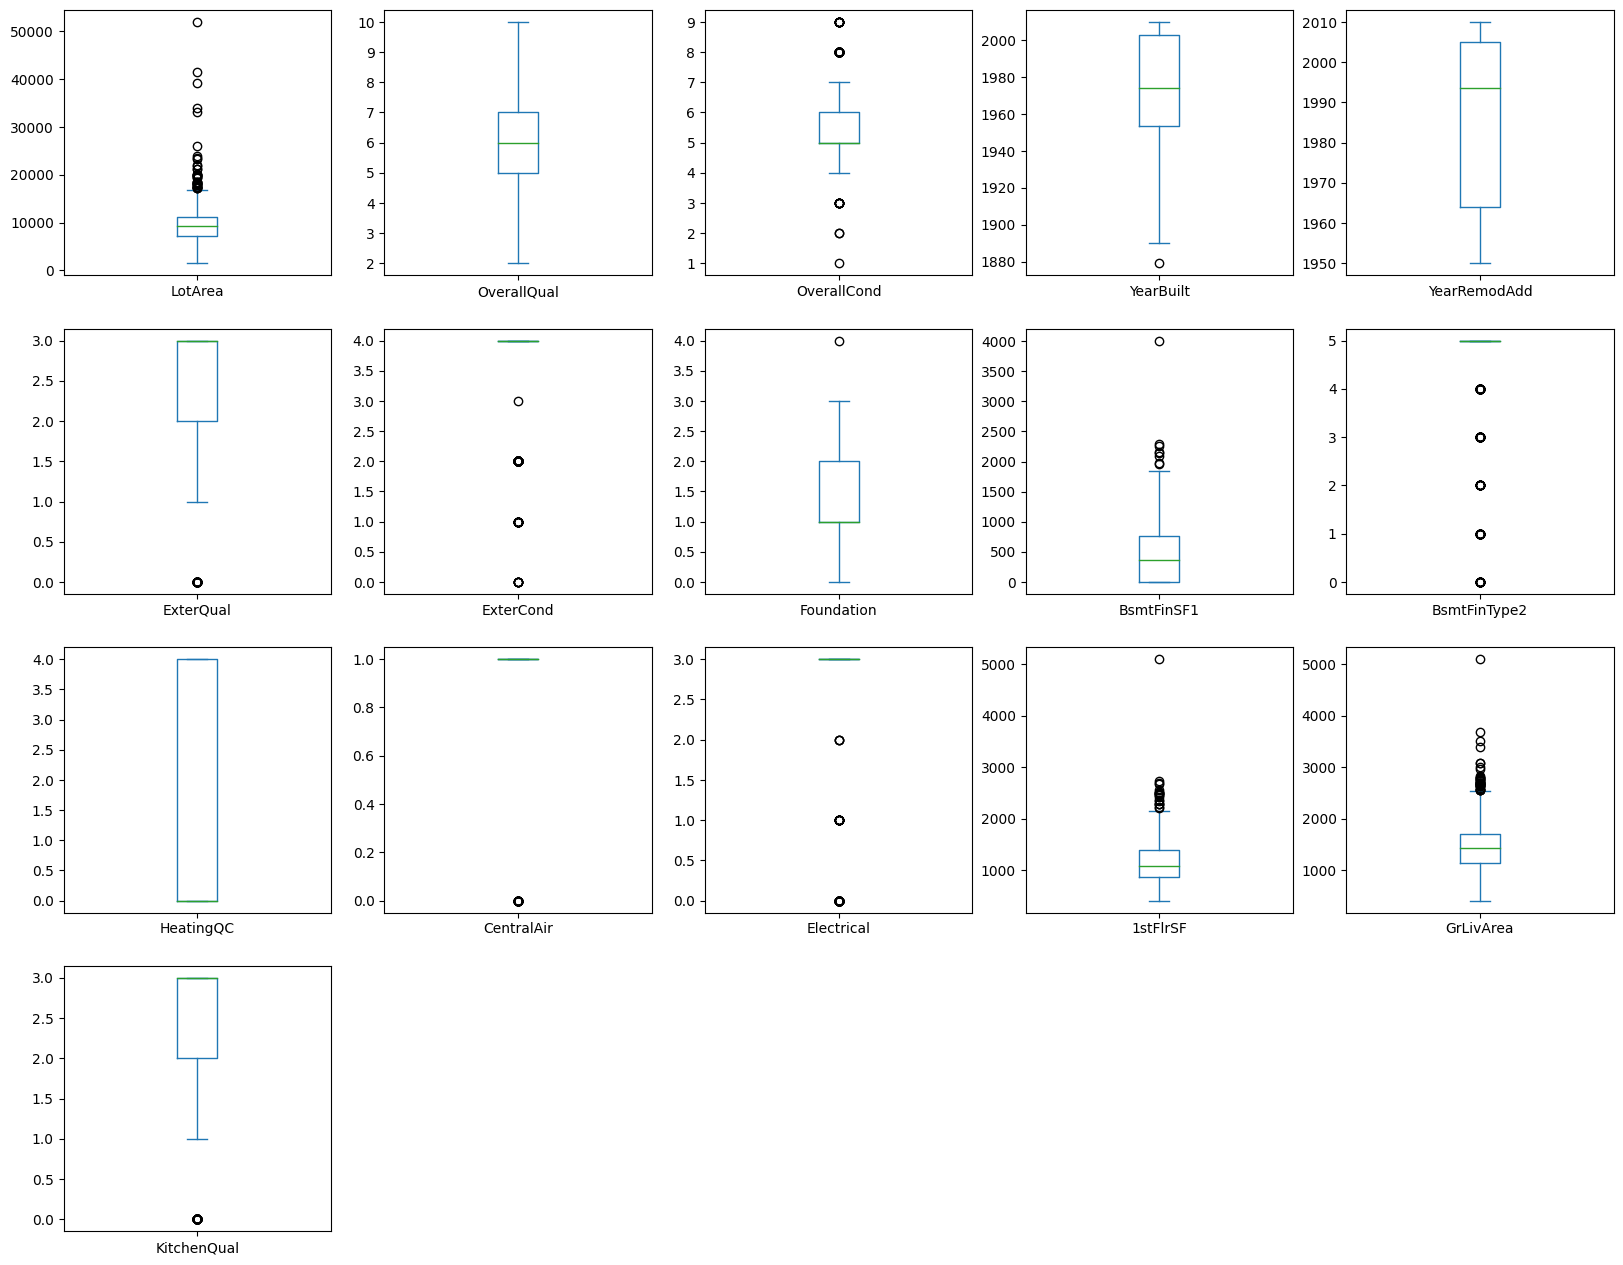

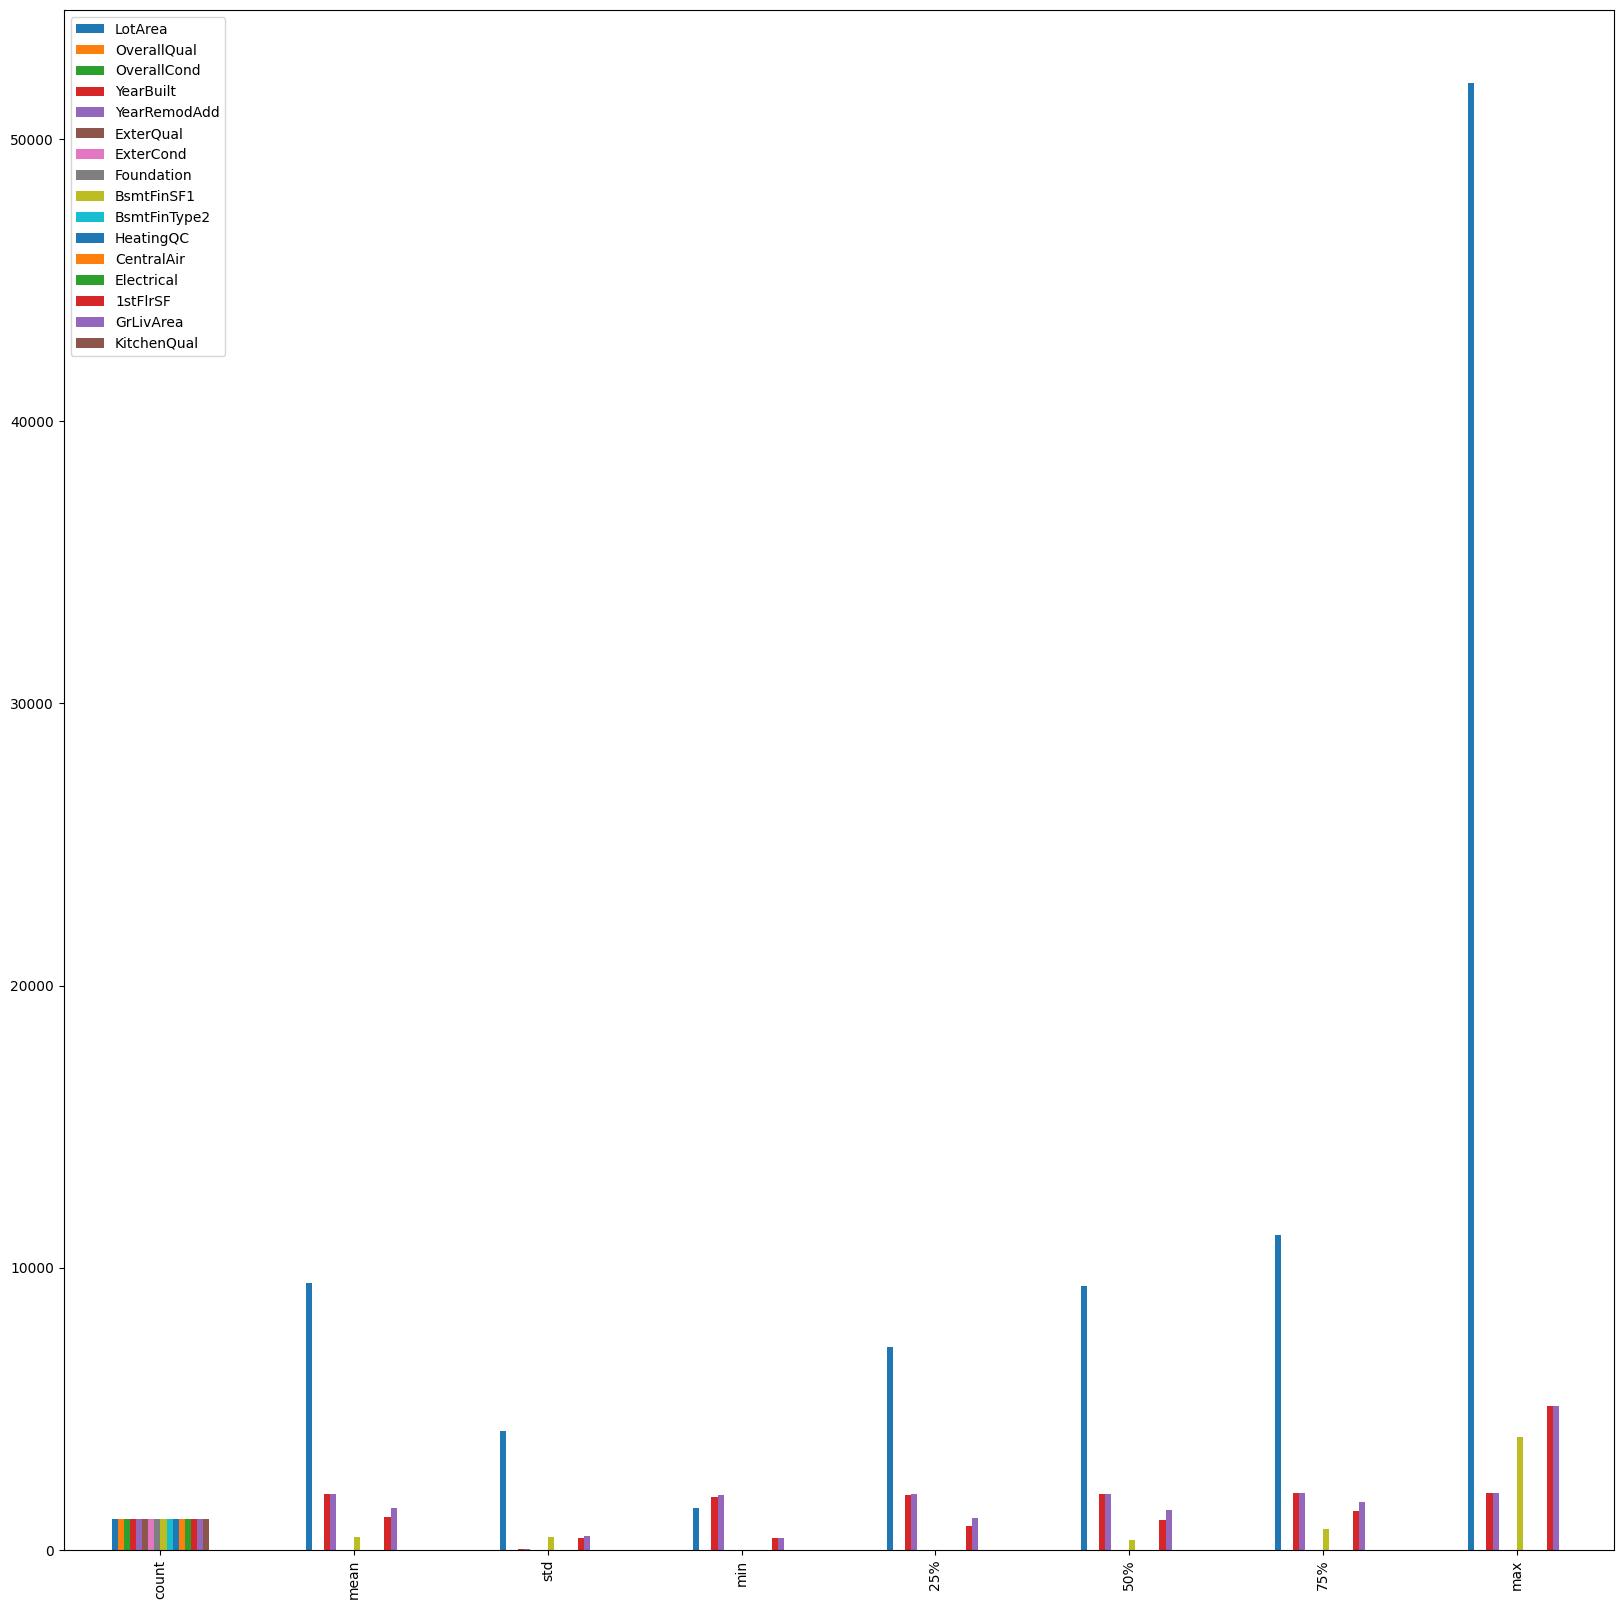

In [232]:
# Visualizing the statistical analysis of the resulting dataframe in a boxplot graph. (And a bar graph of the Statistical Analysis, just for fun).
df.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(20,20))
plt.show()

df.describe().plot(kind='bar', figsize=(20,20))
plt.show()

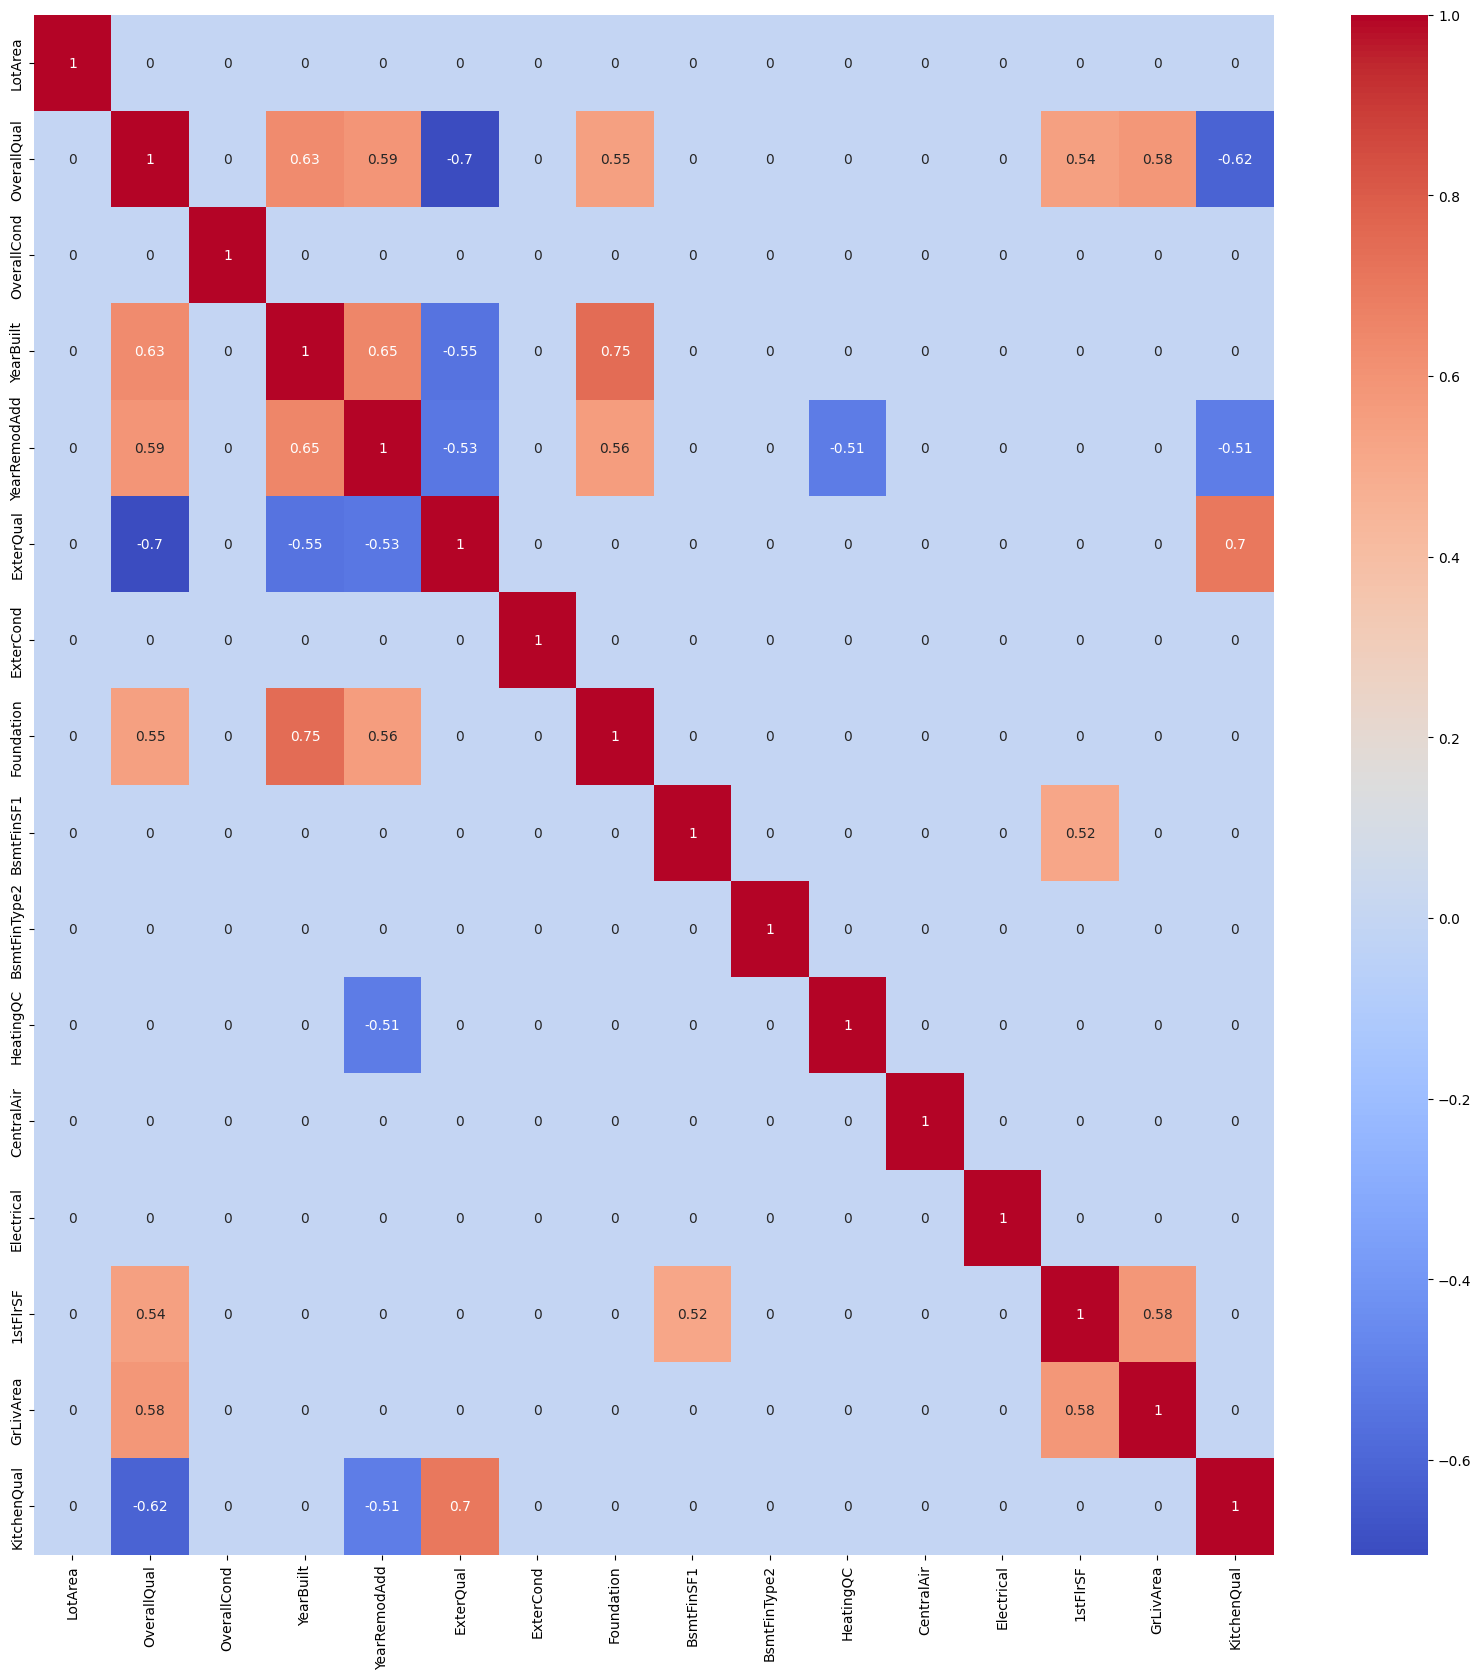

In [233]:
# So nfar so good, now I am mperforming the hypothesis testing of the resulting dataframe, using the statistical analysis of the dataframe in a correlation matrix graph. 
corr_matrix = df.corr()
corr_matrix[abs(corr_matrix) < 0.5] = 0
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



In [234]:
# And now, the Co-Star of the show, the PCA analysis of the resulting dataframe.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head()



principal component 1  principal component 2
0            2116.660250            -613.908687
1            4809.088655             -41.590064
2            4365.016452            -133.709538
3             516.720643               5.614735
4           -4451.446514             148.748675

In [235]:
# Transforming the principal components columns into a an array of values of one dimension 
principalDf = principalDf.values
principalDf


array([[ 2116.66025001,  -613.90868694],
       [ 4809.08865459,   -41.59006426],
       [ 4365.01645171,  -133.70953817],
       ...,
       [-7598.26067911,  -133.50852033],
       [10525.16897534,  -373.90979257],
       [  193.64613804,   389.87049191]])

Coefficients: 
 [[-4.4560675e-05  1.0022170e+00]]
Intercept: 
 [0.03383564]
Mean absolute error: 5.27
Median absolute error: 4.62
Max error: 28.25
Mean absolute percentage error: 0.06


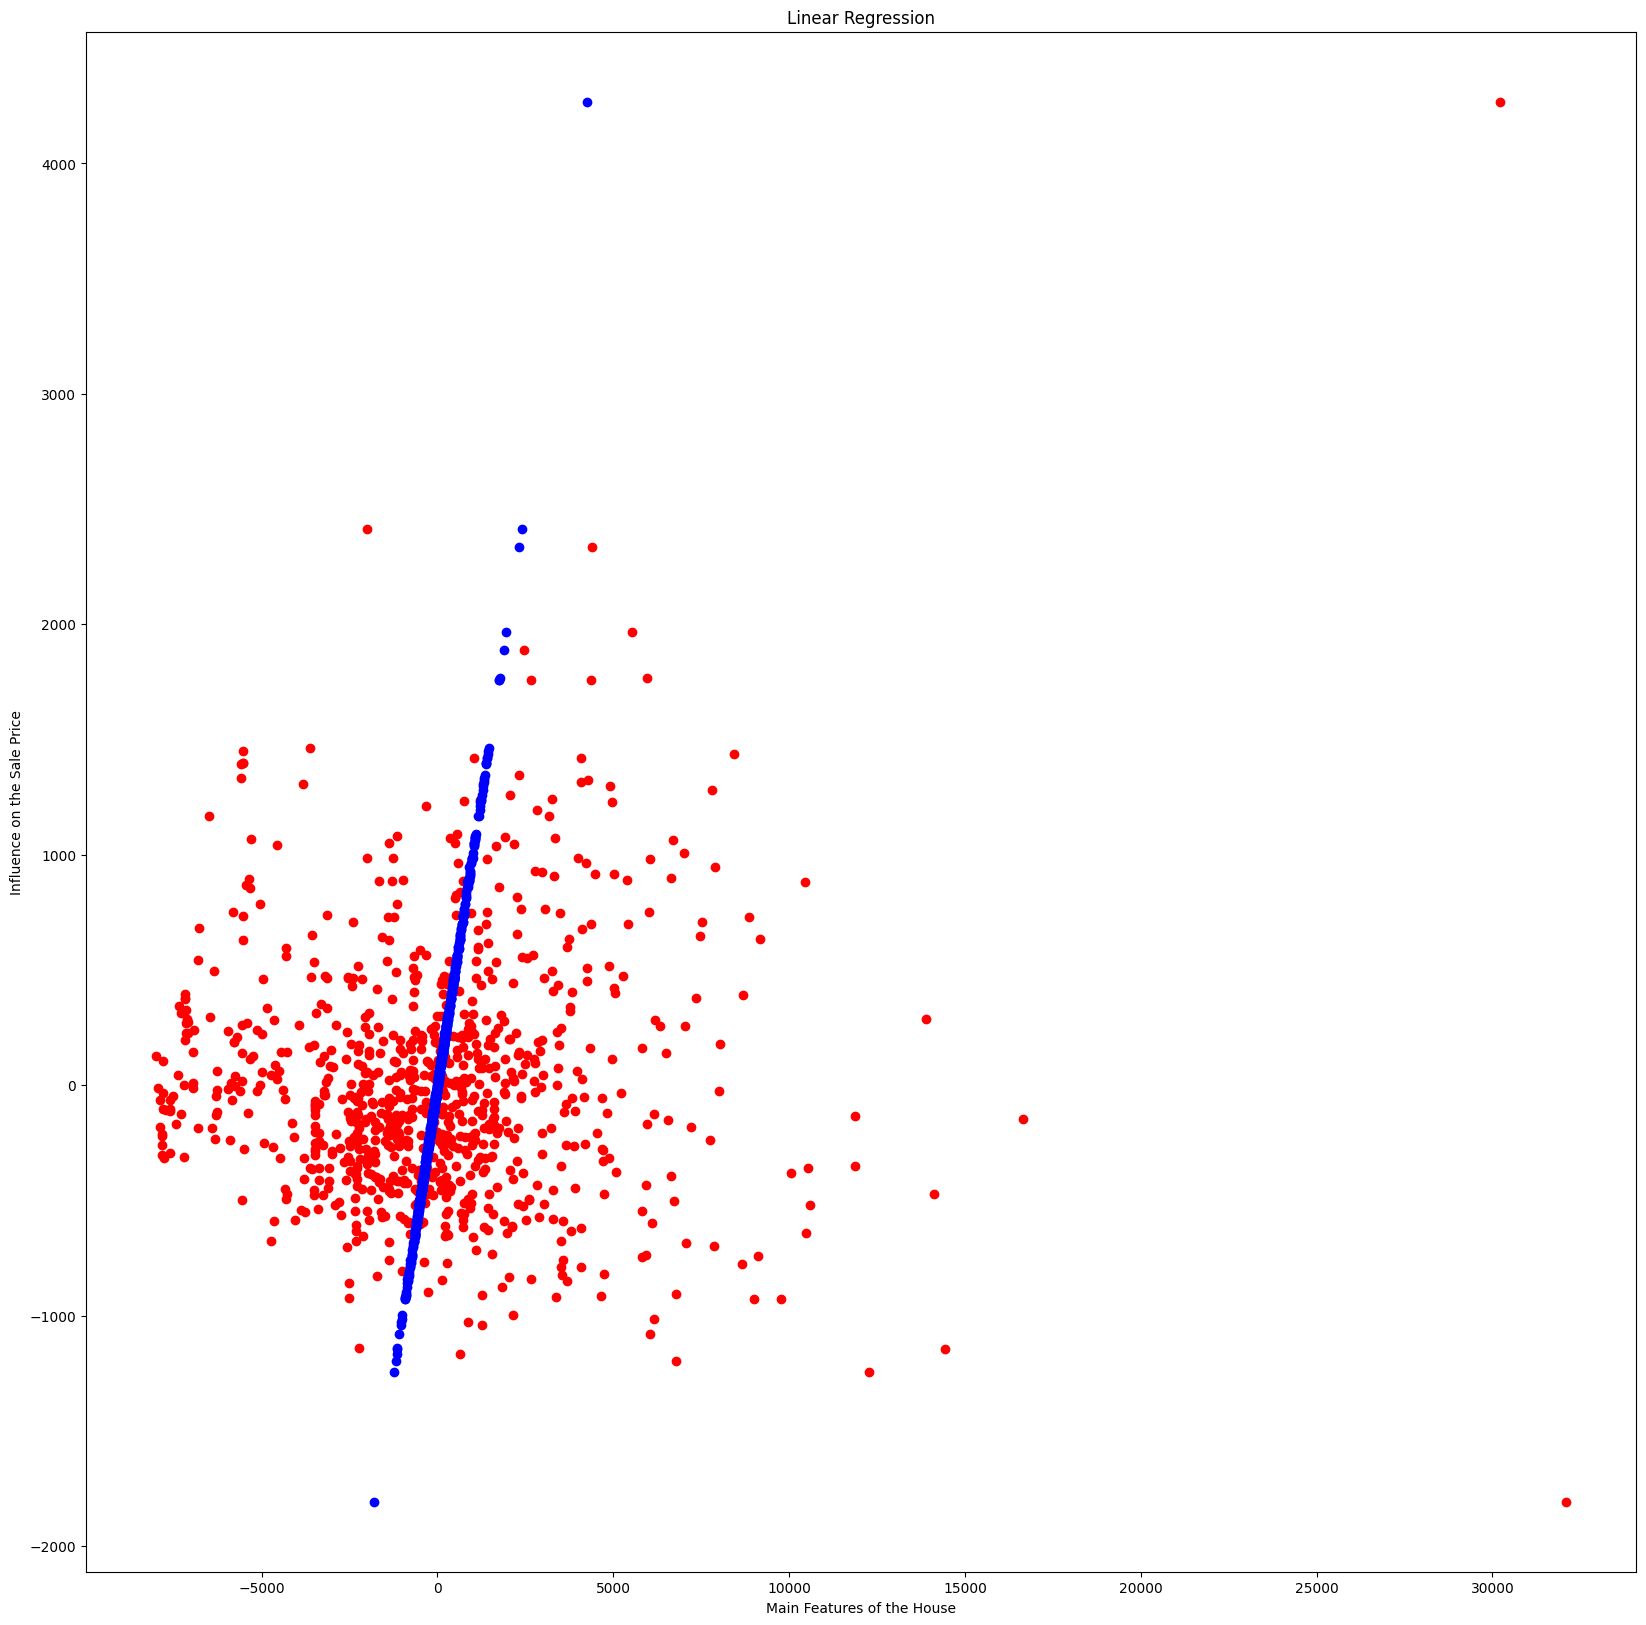

In [236]:
# And now, the Star of the show, the Linear Regression model of the resulting dataframe.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error

X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)
print('Mean absolute error: %.2f'
        % mean_absolute_error(y_test, y_pred))
print('Median absolute error: %.2f'
        % median_absolute_error(y_test, y_pred))
print('Max error: %.2f'
        % max_error(y_test, y_pred))
print('Mean absolute percentage error: %.2f'
        % mean_absolute_percentage_error(y_test, y_pred))

plt.figure(figsize=(20,20))
plt.scatter(X_train[:,0], y_train, color='red')
plt.scatter(X_train[:,1], y_train, color='blue')

plt.title('Linear Regression')
plt.xlabel('Main Features of the House')
plt.ylabel('Influence on the Sale Price')
plt.show()


In [237]:
# So, from the linear regression model and all the previous information, I can conclude that the most important features of the house, the ones that most determine the sale price, are the following:
df.head(25)


LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  ExterQual  \
0     11622            5            6       1961          1961          3   
1     14267            6            6       1958          1958          3   
2     13830            5            5       1997          1998          3   
3      9978            6            6       1998          1998          3   
4      5005            8            5       1992          1992          2   
5     10000            6            5       1993          1994          3   
7      8402            6            5       1998          1998          3   
8     10176            7            5       1990          1990          3   
9      8400            4            5       1970          1970          3   
10     5858            7            5       1999          1999          2   
11     1680            6            5       1971          1971          3   
12     1680            5            5       1971          1971          3   
13     2280            6            6       1975          1975          3   
14     2280            7            6       1975          1975          3   
15    12858            9            5       2009          2010          0   
16    12883            8            5       2009          2010          2   
17    11520            9            5       2005          2005          2   
18    14122            8            5       2005          2006          2   
19    14300            9            5       2003          2004          0   
20    13650            8            5       2002          2002          2   
21     7132            8            5       2006          2006          2   
22    18494            6            5       2005          2005          2   
23     3203            7            5       2006          2006          2   
24    13300            7            5       2004          2004          2   
25     8577            7            5       2004          2004          2   

    ExterCond  Foundation  BsmtFinSF1  BsmtFinType2  HeatingQC  CentralAir  \
0           4           1       468.0             3          4           1   
1           4           1       923.0             5          4           1   
2           4           2       791.0             5          2           1   
3           4           2       602.0             5          0           1   
4           4           2       263.0             5          0           1   
5           4           2         0.0             5          2           1   
7           4           2         0.0             5          2           1   
8           4           2       637.0             5          2           1   
9           4           1       804.0             4          4           1   
10          4           2      1051.0             1          0           1   
11          4           1       156.0             5          4           1   
12          4           1       300.0             5          4           1   
13          4           1       514.0             5          4           1   
14          4           1         0.0             5          0           1   
15          4           2         0.0             5          0           1   
16          4           2         0.0             5          0           1   
17          4           2       110.0             5          0           1   
18          4           2        28.0             5          0           1   
19          4           2      1373.0             5          0           1   
20          4           2       578.0             5          0           1   
21          4           2        24.0             5          0           1   
22          4           2         0.0             5          0           1   
23          4           2        16.0             5          0           1   
24          4           2       326.0             5          0           1   
25          4           2         0.0             5

THE END.